<a href="https://colab.research.google.com/github/rastehNili/lending_club_case/blob/main/ML_C56_Facilitator_RastehNili.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Results Expected

Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

*   Write all your code in one well-commented Python file; briefly mention the insights and observations from the analysis

*   Present the overall approach of the analysis in a presentation:

> 1. Mention the problem statement and the analysis approach briefly

> 2. Explain the results of univariate, bivariate analysis etc. in business terms

> 3. Include visualisations and summarise the most important results in the presentation

*   You need to submit one Ipython notebook which clearly explains the thought process behind your analysis (either in comments of markdown text), code and relevant plots.

# Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

*   If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
*   If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.


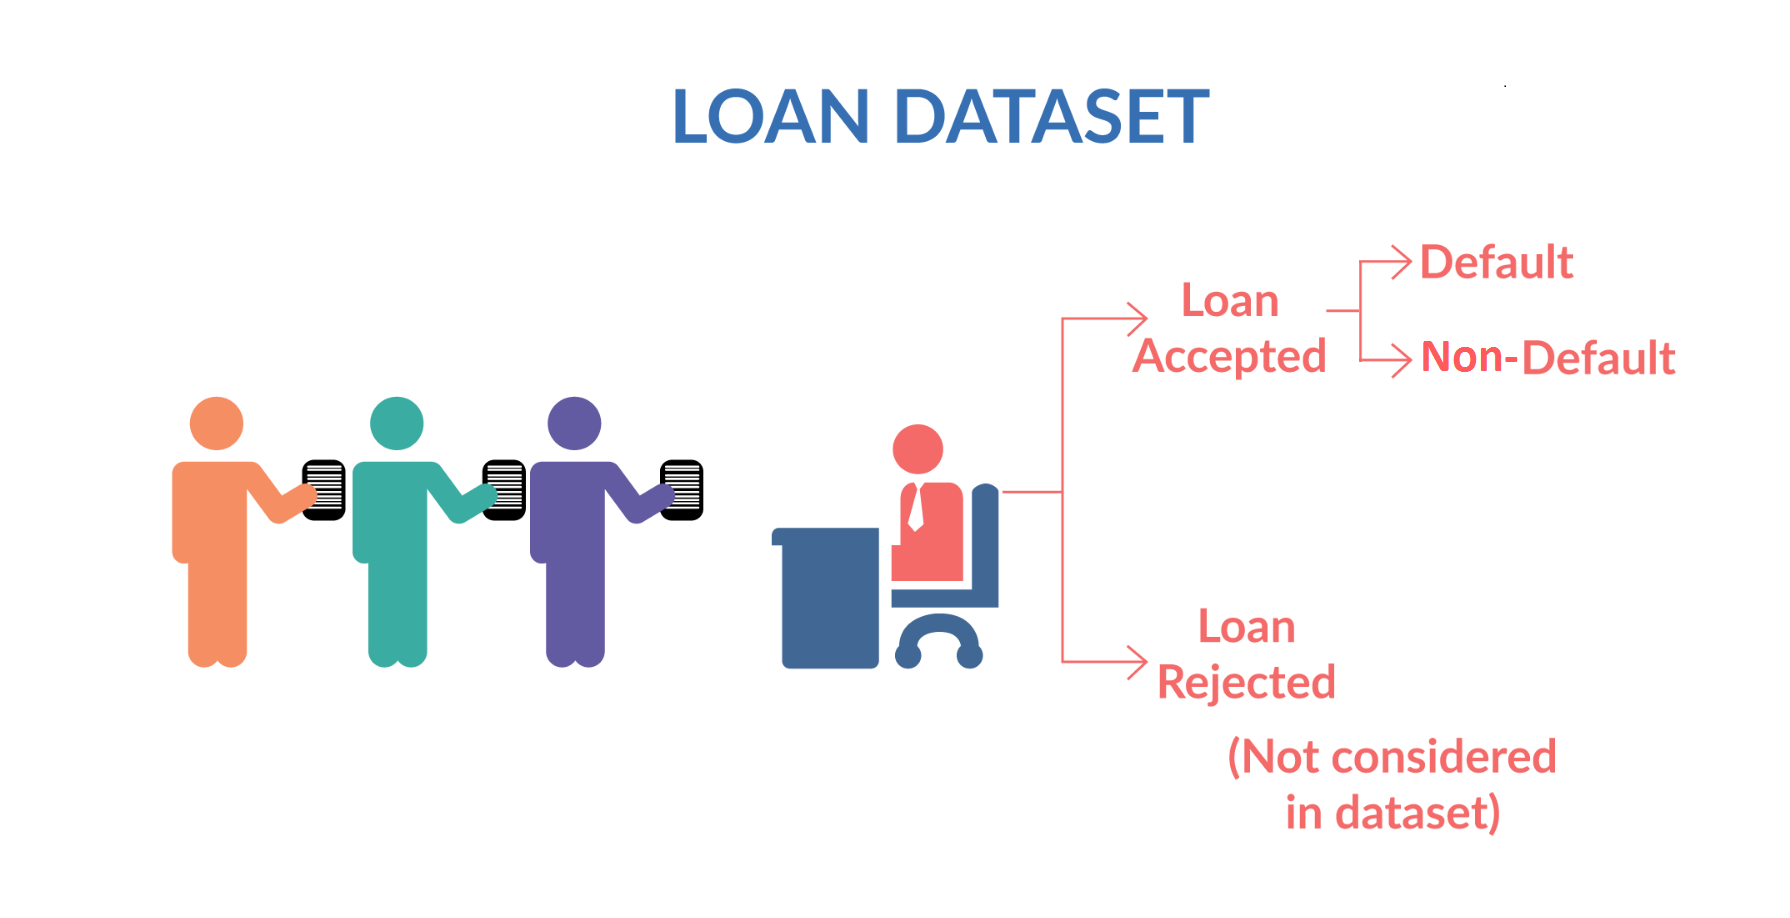

When a person applies for a loan, there are two types of decisions that could be taken by the company:



1. **Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

> *   **Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)
> *   **Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
> *   **Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has **defaulted** on the loan

2.   **Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)



# Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.



Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who **default** cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.



If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.



In other words, the company wants to understand the **driving factors (or driver variables)** behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

# **Beusiness Objection**

*   Lending Club is the largest online loan marketplace that facilitate personal
*   loans, business loans, and financing of medical procedures.
*   Through this company Borrowers easily access low interest loans through online interface.
*   Like most lending companies, the major source of financial loss in this company is lending loans to risky applicants.
*   The objective of this analysis is to understand driving factors behind loan default to be able to identify risky applicants “defaulted” using risk analytics on collected data from past applicants.

# **Loading Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls "/content/drive/MyDrive/upgrad/1.StatisticsEssentials/lendingClubCaseStudy"

 Data_Dictionary.xlsx		    loan.csv
'Lending Club Case Study.gslides'  'ML C56_Facilitator_RastehNili.ipynb'


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Javascript
warnings.filterwarnings('ignore')

In [4]:
ROOT_PATH = "/content/drive/MyDrive/upgrad/1.StatisticsEssentials/lendingClubCaseStudy"
df = pd.read_csv(f"{ROOT_PATH}/loan.csv")
df = df.dropna(axis='columns', how='all')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


Get information on the data

In [5]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [6]:
xls = pd.ExcelFile(f"{ROOT_PATH}/Data_Dictionary.xlsx")
print(xls.sheet_names)
loanStatDf = pd.read_excel(xls, sheet_name="LoanStats")
rejctStatDf = pd.read_excel(xls, sheet_name="RejectStats")

['LoanStats', 'RejectStats']


In [7]:
loanStatDf.head(loanStatDf.shape[0])

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


In [8]:
rejctStatDf.head(rejctStatDf.shape[0])

,RejectStats File,Description
0,Amount Requested,The total amount requested by the borrower
1,Application Date,The date which the borrower applied
2,Loan Title,The loan title provided by the borrower
3,Risk_Score,"For applications prior to November 5, 2013 the..."
4,Debt-To-Income Ratio,A ratio calculated using the borrower’s total ...
5,Zip Code,The first 3 numbers of the zip code provided b...
6,State,The state provided by the borrower in the loan...
7,Employment Length,Employment length in years. Possible values ar...
8,Policy Code,publicly available policy_code=1\nnew products...


# **Cleaning Data**

Check Percentage of missing values in each column

In [9]:
percNaDf = (df.isnull().sum()/df.shape[0])*100
percNaDf[percNaDf>0].head(20)

emp_title                      6.191303
emp_length                     2.706650
desc                          32.580507
title                          0.027696
mths_since_last_delinq        64.662487
mths_since_last_record        92.985372
revol_util                     0.125891
last_pymnt_d                   0.178765
next_pymnt_d                  97.129693
last_credit_pull_d             0.005036
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
pub_rec_bankruptcies           1.754916
tax_liens                      0.098195
dtype: float64

Removing columns with more than 30% missing values

In [10]:
df.drop(percNaDf[percNaDf>30].index, axis=1, inplace=True)
df.shape

(39717, 53)

Identify low variant columns

In [11]:
variantDf = df.nunique().sort_values()
variantDf.head(20)

tax_liens                      1
delinq_amnt                    1
chargeoff_within_12_mths       1
acc_now_delinq                 1
application_type               1
policy_code                    1
collections_12_mths_ex_med     1
initial_list_status            1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
verification_status            3
loan_status                    3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
dtype: int64

Remove univariant columns

In [12]:
df = df[variantDf[variantDf > 1].index]
df.shape

(39717, 44)

In [13]:
df.head()

,term,pub_rec_bankruptcies,verification_status,loan_status,pub_rec,home_ownership,grade,inq_last_6mths,delinq_2yrs,emp_length,...,title,revol_bal,emp_title,last_pymnt_amnt,total_rec_int,total_pymnt_inv,total_pymnt,url,member_id,id
0,36 months,0.0,Verified,Fully Paid,0,RENT,B,1,0,10+ years,...,Computer,13648,NaN,171.62,863.16,5833.84,5863.155187,https://lendingclub.com/browse/loanDetail.acti...,1296599,1077501
1,60 months,0.0,Source Verified,Charged Off,0,RENT,C,5,0,< 1 year,...,bike,1687,Ryder,119.66,435.17,1008.71,1008.710000,https://lendingclub.com/browse/loanDetail.acti...,1314167,1077430
2,36 months,0.0,Not Verified,Fully Paid,0,RENT,C,2,0,10+ years,...,real estate business,2956,NaN,649.91,605.67,3005.67,3005.666844,https://lendingclub.com/browse/loanDetail.acti...,1313524,1077175
3,36 months,0.0,Source Verified,Fully Paid,0,RENT,C,1,0,10+ years,...,personel,5598,AIR RESOURCES BOARD,357.48,2214.92,12231.89,12231.890000,https://lendingclub.com/browse/loanDetail.acti...,1277178,1076863
4,60 months,0.0,Source Verified,Current,0,RENT,B,0,0,1 year,...,Personal,27783,University Medical Group,67.79,1037.39,3513.33,3513.330000,https://lendingclub.com/browse/loanDetail.acti...,1311748,1075358


Find number of unique values

In [14]:
df.nunique().sort_values(ascending=False).head(15)

id                 39717
member_id          39717
url                39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
revol_bal          21711
title              19615
installment        15383
funded_amnt_inv     8205
total_rec_prncp     7976
annual_inc          5318
recoveries          4040
dtype: int64

In [15]:
print("member_id:", df["member_id"].values)
print("id:", df["id"].values)
print("url:", df["url"].values)

member_id: [1296599 1314167 1313524 ...   90390   89243   86999]
id: [1077501 1077430 1077175 ...   90395   90376   87023]
url: ['https://lendingclub.com/browse/loanDetail.action?loan_id=1077501'
 'https://lendingclub.com/browse/loanDetail.action?loan_id=1077430'
 'https://lendingclub.com/browse/loanDetail.action?loan_id=1077175' ...
 'https://lendingclub.com/browse/loanDetail.action?loan_id=90395'
 'https://lendingclub.com/browse/loanDetail.action?loan_id=90376'
 'https://lendingclub.com/browse/loanDetail.action?loan_id=87023']


"member_id", "id" and "url" are variables with all the values being unique. So all of them can be used as the identifier. I will keep the member_id and remove the others, since they don't have any effedct on our analysis.

In [16]:
df.drop(["id", "url"], axis=1, inplace=True)
df.shape

(39717, 42)

In [17]:
print("emp_title:", df["emp_title"].values, ", Number of unique values:", df["emp_title"].nunique(), ", Number of NA's:", df["emp_title"].isnull().sum())
print("title:", df["title"].values, ", Number of unique values:", df["title"].nunique(), ", Number of NA's:", df["title"].isnull().sum())

emp_title: [nan 'Ryder' nan ... nan nan 'Evergreen Center'] , Number of unique values: 28820 , Number of NA's: 2459
title: ['Computer' 'bike' 'real estate business' ... 'MBA Loan Consolidation'
 'JAL Loan' 'Consolidation Loan'] , Number of unique values: 19615 , Number of NA's: 11


emp_title and title columns are string based columns which most of their values are unique. So we can remove them too.

In [18]:
df.drop(["emp_title", "title"], axis=1, inplace=True)
df.shape

(39717, 40)

In [19]:
df.columns

Index(['term', 'pub_rec_bankruptcies', 'verification_status', 'loan_status',
       'pub_rec', 'home_ownership', 'grade', 'inq_last_6mths', 'delinq_2yrs',
       'emp_length', 'purpose', 'sub_grade', 'open_acc', 'addr_state',
       'issue_d', 'total_acc', 'last_pymnt_d', 'last_credit_pull_d',
       'int_rate', 'earliest_cr_line', 'zip_code', 'loan_amnt', 'funded_amnt',
       'revol_util', 'out_prncp', 'out_prncp_inv', 'total_rec_late_fee',
       'collection_recovery_fee', 'dti', 'recoveries', 'annual_inc',
       'total_rec_prncp', 'funded_amnt_inv', 'installment', 'revol_bal',
       'last_pymnt_amnt', 'total_rec_int', 'total_pymnt_inv', 'total_pymnt',
       'member_id'],
      dtype='object')

In [20]:
print(df.duplicated(subset=None, keep='first').count())
df.drop_duplicates(inplace=True)
print(df.shape)

39717
(39717, 40)


total_rec_late_fee, recoveries, collection_recovery_fee variables are related

1.   total_rec_late_fee, recoveries, collection_recovery_fee variables are related to the late payment charges. So they will not be useful for estimation of risk association for each participant.

2.   last_credit_pull_d, last_pymnt_d, are dates for last pulled credit and last payments. So they cannot be considered as risk factors.

3.   out_prncp_inv, out_prncp are mainely related to remaining payments. So there is no association between these variables and risk factors.

4.   total_rec_int, total_rec_prncp are general information on the payments recived. So they are not an indicator of risk factors.

Since these variables are not considered as risk factors we can remove them.


In [21]:
notRiskFactor = ["total_rec_int", "total_rec_prncp", "total_rec_late_fee", "recoveries",
                 "collection_recovery_fee", "last_credit_pull_d", "last_pymnt_d", "out_prncp", "out_prncp_inv"]
df.drop(notRiskFactor, axis=1, inplace=True)

print(df.shape)

(39717, 31)


In [22]:
df.head(15)

,term,pub_rec_bankruptcies,verification_status,loan_status,pub_rec,home_ownership,grade,inq_last_6mths,delinq_2yrs,emp_length,...,revol_util,dti,annual_inc,funded_amnt_inv,installment,revol_bal,last_pymnt_amnt,total_pymnt_inv,total_pymnt,member_id
0,36 months,0.0,Verified,Fully Paid,0,RENT,B,1,0,10+ years,...,83.70%,27.65,24000.0,4975.0,162.87,13648,171.62,5833.84,5863.155187,1296599
1,60 months,0.0,Source Verified,Charged Off,0,RENT,C,5,0,< 1 year,...,9.40%,1.00,30000.0,2500.0,59.83,1687,119.66,1008.71,1008.710000,1314167
2,36 months,0.0,Not Verified,Fully Paid,0,RENT,C,2,0,10+ years,...,98.50%,8.72,12252.0,2400.0,84.33,2956,649.91,3005.67,3005.666844,1313524
3,36 months,0.0,Source Verified,Fully Paid,0,RENT,C,1,0,10+ years,...,21%,20.00,49200.0,10000.0,339.31,5598,357.48,12231.89,12231.890000,1277178
4,60 months,0.0,Source Verified,Current,0,RENT,B,0,0,1 year,...,53.90%,17.94,80000.0,3000.0,67.79,27783,67.79,3513.33,3513.330000,1311748
5,36 months,0.0,Source Verified,Fully Paid,0,RENT,A,3,0,3 years,...,28.30%,11.20,36000.0,5000.0,156.46,7963,161.03,5632.21,5632.210000,1311441
6,60 months,0.0,Not Verified,Fully Paid,0,RENT,C,1,0,8 years,...,85.60%,23.51,47004.0,7000.0,170.08,17726,1313.76,10110.84,10110.840000,1304742
7,36 months,0.0,Source Verified,Fully Paid,0,RENT,E,2,0,9 years,...,87.50%,5.35,48000.0,3000.0,109.43,8221,111.34,3939.14,3939.135294,1288686
8,60 months,0.0,Source Verified,Charged Off,0,OWN,F,2,0,4 years,...,32.60%,5.55,40000.0,5600.0,152.39,5210,152.39,646.02,646.020000,1306957
9,60 months,0.0,Verified,Charged Off,0,RENT,B,0,0,< 1 year,...,36.50%,18.08,15000.0,5350.0,121.45,9279,121.45,1469.34,1476.190000,1306721


From variables left loan status is very important since we are only interested in the loans have diffinite answer of being payed off or are defaulted.


In [23]:
print(df['loan_status'].unique())

['Fully Paid' 'Charged Off' 'Current']


There are three different levels for loans status; Fully Paid, Charged off and current. Fully Paid and Charged off are considered as those loans that the result is cleared out as being defaulted or not but the current ones we do not know what would be the final result. So lenders that the status of their loan is current will be removed from the data.

In [24]:
df = df[df.loan_status!="Current"]
df.shape

(38577, 31)

From remaining subjects we want to identify percentage of missing values in each row. If there is a low percentage of rows have missing values since we have 39717 rows, we better to remove those rows instead of introducing bias to the analysis by applying imputation.

In [25]:
perceSubjNull = round((df.isnull().values.ravel().sum()/len(df.index))*100, 2)
perceSubjNull

4.61

Less than 5% of rows have missing values. We check the columns these missing values are blong to. If we can recover these missing values from other information we will do. If we can not and they are vital information it is better to remove them.  and remove them if they

In [ ]:
# Columns that have missing values
# print(round(df.isnull().sum()), 2)
percNaCol = round(100*(df.isnull().sum()/len(df.index)), 2)
percNaCol[percNaCol>0]

In [ ]:
df.columns

emp_length: Employment length in years.

revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

pub_rec_bankruptcies: Number of public record bankruptcies.

All of these informations are all vital information. Since missing values for revol_util is less than 0.5% we can remove rows with missing values for that column.



In [ ]:
df.dropna(axis=0, subset=["revol_util"], inplace=True)
df.revol_util.isna().sum()

In [ ]:
# Columns that have missing values
percNaCol = round(100*(df.isnull().sum()/len(df.index)), 2)
percNaCol[percNaCol>0]

Now we want to see how many subjects having missing values for both bakrupcies and employment lenght

In [ ]:
df[["pub_rec_bankruptcies", "emp_length"]].isnull().all(1).sum()

Since these two variables are categorical and we don't know the value for them we can fill the null values by an string such as: "Not Known"

In [31]:

df["pub_rec_bankruptcies"].fillna('Not Known',inplace=True)
# df["pub_rec_bankruptcies"] = df["pub_rec_bankruptcies"].str.replace(".0", "")
df["emp_length"].fillna('Not Known',inplace=True)

print(df.pub_rec_bankruptcies.unique())
print(df.emp_length.unique())

[0.0 1.0 2.0 'Not Known']
['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years' 'Not Known']


Now we want to find number of factors for categorical (string base) columns

In [32]:
print(df.dtypes)

term                     object
pub_rec_bankruptcies     object
verification_status      object
loan_status              object
pub_rec                   int64
home_ownership           object
grade                    object
inq_last_6mths            int64
delinq_2yrs               int64
emp_length               object
purpose                  object
sub_grade                object
open_acc                  int64
addr_state               object
issue_d                  object
total_acc                 int64
int_rate                 object
earliest_cr_line         object
zip_code                 object
loan_amnt                 int64
funded_amnt               int64
revol_util               object
dti                     float64
annual_inc              float64
funded_amnt_inv         float64
installment             float64
revol_bal                 int64
last_pymnt_amnt         float64
total_pymnt_inv         float64
total_pymnt             float64
member_id                 int64
dtype: o

In [33]:
print(df['term'].unique())

[' 36 months' ' 60 months']


Term is a categorical column with two factors. There is an extra spacea at the begining of each category so we need to remove those spaces

In [34]:
df["term"] = df.term.str.strip()
print(df['term'].unique())

['36 months' '60 months']


issue_d: The month which the loan was funded

earliest_cr_line: The month the borrower's earliest reported credit line was opened

issue_d and earliest_cr_line are date columns that can be splited to month and year

**There are Some years that are being converted to more than 2023 since they belong to befor unix time stamp.
So subtracting 100 from those years will give us more accurate results.**

In [35]:

df["issue_d"] = pd.to_datetime(df["issue_d"], format="%b-%y")

df["issue_year"] = df["issue_d"].dt.year
df["issue_year"] = df["issue_year"].apply(lambda x: x-100 if x > 2023 else x)

df["issue_month"] = df["issue_d"].dt.month

# print(df[["issue_d", "issue_year"]])

df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"], format="%b-%y")

df["earliest_cr_line_year"] = df["earliest_cr_line"].dt.year
df["earliest_cr_line_year"] = df["earliest_cr_line_year"].apply(lambda x: x-100 if x > 2023 else x)

df["earliest_cr_line_month"] = df["earliest_cr_line"].dt.month

df.drop(["issue_d", "earliest_cr_line"], axis=1, inplace=True)
print(df.earliest_cr_line_year.unique(), df.issue_year.unique())


[1985 1999 2001 1996 2004 2005 2007 1998 1989 2003 1991 1993 1997 1983
 2002 1984 2006 1987 1981 2000 1994 1995 1992 1986 1990 1988 1980 2008
 1979 1978 1971 1972 1970 1969 1975 1982 1976 1977 1962 1973 1968 1974
 1967 1965 1963 1954 1966 1964 1959 1956 1946 1950 1961] [2011 2010 2009 2008 2007]


In [36]:
print(df.revol_util.unique())
print(df.revol_util.nunique())

print(df.int_rate.unique())
print(df.int_rate.nunique())

['83.70%' '9.40%' '98.50%' ... '49.63%' '0.04%' '7.28%']
1088
['10.65%' '15.27%' '15.96%' '13.49%' '7.90%' '18.64%' '21.28%' '12.69%'
 '14.65%' '9.91%' '16.29%' '6.03%' '11.71%' '12.42%' '14.27%' '16.77%'
 '7.51%' '8.90%' '18.25%' '6.62%' '19.91%' '17.27%' '17.58%' '21.67%'
 '19.42%' '20.89%' '20.30%' '23.91%' '19.03%' '23.13%' '22.74%' '22.35%'
 '22.06%' '24.11%' '6.00%' '23.52%' '22.11%' '7.49%' '11.99%' '5.99%'
 '10.99%' '9.99%' '18.79%' '11.49%' '8.49%' '15.99%' '16.49%' '6.99%'
 '12.99%' '15.23%' '14.79%' '5.42%' '10.59%' '17.49%' '15.62%' '19.29%'
 '13.99%' '18.39%' '16.89%' '17.99%' '20.99%' '22.85%' '19.69%' '20.62%'
 '20.25%' '21.36%' '23.22%' '21.74%' '22.48%' '23.59%' '12.62%' '18.07%'
 '11.63%' '7.91%' '7.42%' '11.14%' '20.20%' '12.12%' '19.39%' '16.11%'
 '17.54%' '22.64%' '13.84%' '16.59%' '17.19%' '12.87%' '20.69%' '9.67%'
 '21.82%' '19.79%' '18.49%' '22.94%' '24.40%' '21.48%' '14.82%' '14.17%'
 '7.29%' '17.88%' '20.11%' '16.02%' '13.43%' '14.91%' '13.06%' '15.28%'
 '15.6

revol_util and int_rate are numerical columns that because of % sign been presented as string based column. So we need to remove the % from these columns and convert ithem to numerical.

In [37]:
df["revol_util"] = df["revol_util"].str.replace("%", "").astype(float)
df["int_rate"] = df["int_rate"].str.replace("%", "").astype(float)

# **Univariate Analysis**

### **For Numerical variables**: Get general idea about all the numerical variables

In [38]:
# numericalCols = ["issue_year", "issue_month", "earliest_cr_line_year", "earliest_cr_line_month",
#                  "pub_rec", "delinq_2yrs", "inq_last_6mths", "open_acc", "total_acc",
#                  "int_rate", "loan_amnt", "funded_amnt", "revol_util", "dti", "annual_inc",
#                  "funded_amnt_inv", "installment", "last_pymnt_amnt", "total_pymnt",
#                  "total_pymnt_inv"]
numericalCols = ["int_rate", "loan_amnt", "funded_amnt", "revol_util", "dti", "annual_inc",
                 "funded_amnt_inv", "installment", "last_pymnt_amnt", "total_pymnt",
                 "total_pymnt_inv"]

df[numericalCols].describe()

,int_rate,loan_amnt,funded_amnt,revol_util,dti,annual_inc,funded_amnt_inv,installment,last_pymnt_amnt,total_pymnt,total_pymnt_inv
count,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000,3.852700e+04,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000
mean,11.927378,11055.265139,10791.956939,48.702777,13.276353,6.880923e+04,10230.940095,322.678650,2749.201526,11876.606662,11281.016641
std,3.690161,7348.433587,7090.256225,28.364741,6.671392,6.421493e+04,7022.678989,208.649278,4496.740039,8810.442949,8701.345967
min,5.420000,500.000000,500.000000,0.000000,0.000000,4.000000e+03,0.000000,15.690000,0.000000,0.000000,0.000000
25%,8.940000,5325.000000,5200.000000,25.200000,8.140000,4.000000e+04,5000.000000,165.740000,217.775000,5519.447680,5031.275000
50%,11.710000,9600.000000,9600.000000,49.100000,13.370000,5.900000e+04,8750.000000,278.150000,569.030000,9685.515720,9076.500000
75%,14.350000,15000.000000,15000.000000,72.300000,18.560000,8.200000e+04,14000.000000,425.860000,3451.365000,16147.246055,15341.180000
max,24.400000,35000.000000,35000.000000,99.900000,29.990000,6.000000e+06,35000.000000,1305.190000,36115.200000,58563.679930,58563.680000


The distribution and possible outliers in each of these continues variables will be investigated using histogram and box plot. Aside from identifying possible outlier we need to look at the distribution of the data to be able to:

1.   Identify ant skwednes or possible divergence to specific value
2.   Check the normality for selecting proper statistical tests



In [39]:
def dist_investigate(data, label):
  plt.figure(figsize=(16,4))

  plt.subplot(1,2,1)
  sns.distplot(data)
  plt.xlabel(label)

  plt.subplot(1,2,2)
  sns.boxplot(data)
  plt.xlabel(label)

  plt.gca().set_xticklabels([])
  plt.suptitle(label, fontsize=20, fontweight="bold")
  plt.show()

In [40]:
distributionDict = {"Interest Rate": "int_rate", "Loan Amount": "loan_amnt", "Funded Loan Amount":"funded_amnt",
                    "Loan Used Relative to Available": "revol_util", "Ration Debt Pay to Debt Obligation":"dti",
                    "Anual Income":"annual_inc", "Funded Amount Investment":"funded_amnt_inv", "Installment": "installment",
                    "Last Payment Amount":"last_pymnt_amnt", "Total Payment Recieved Today": "total_pymnt",
                    "Payment Recieved For Funded Proportion" :"total_pymnt_inv", "Total Credit Revolving Balance": "revol_bal",}

<IPython.core.display.Javascript object>

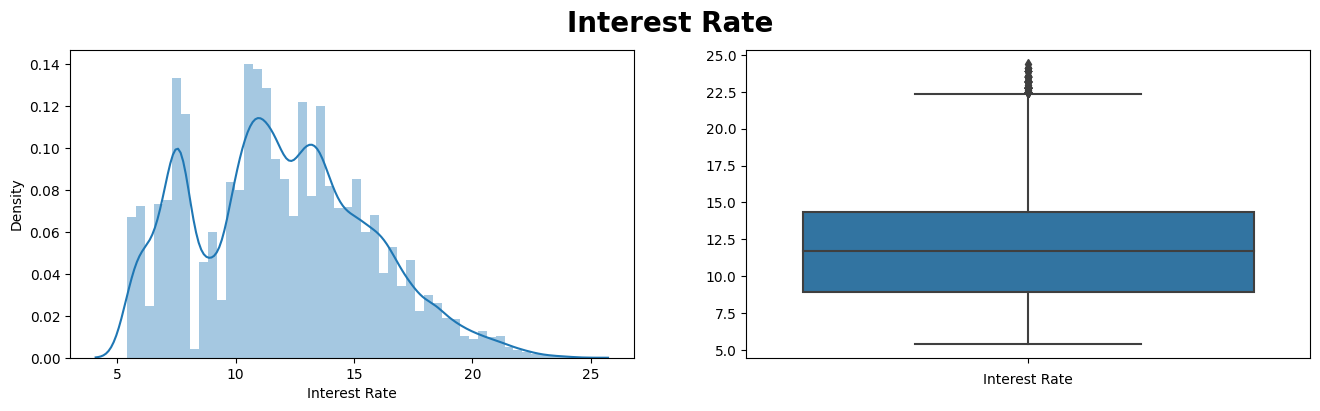

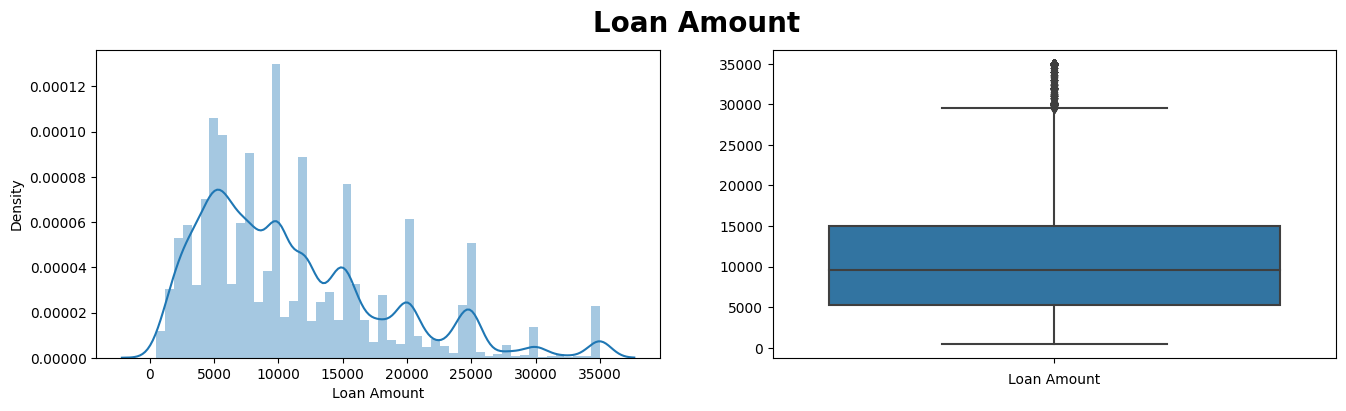

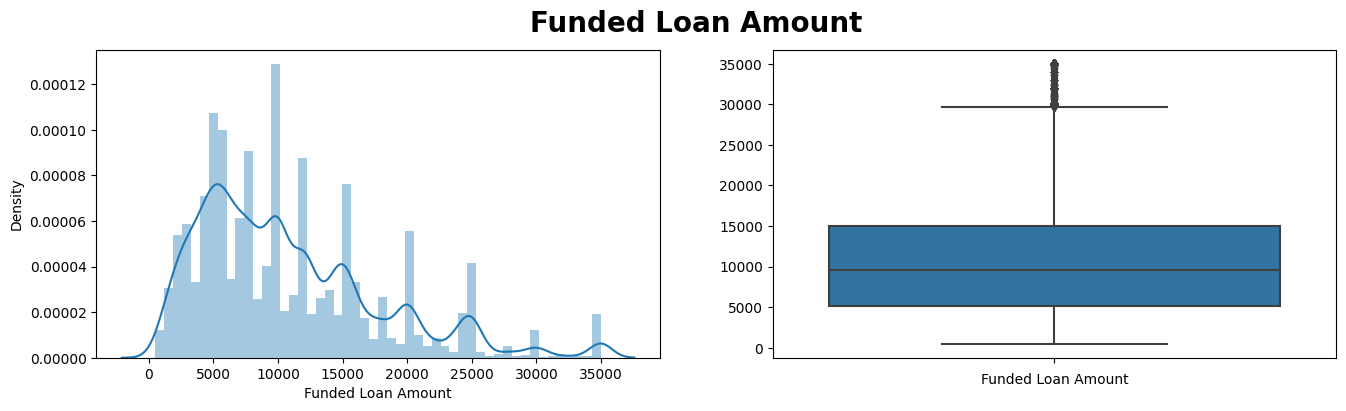

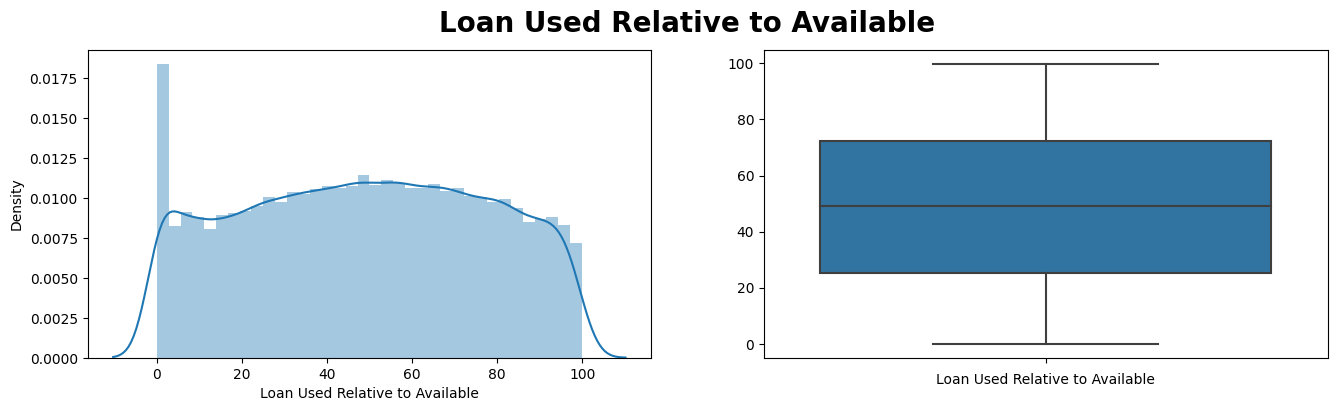

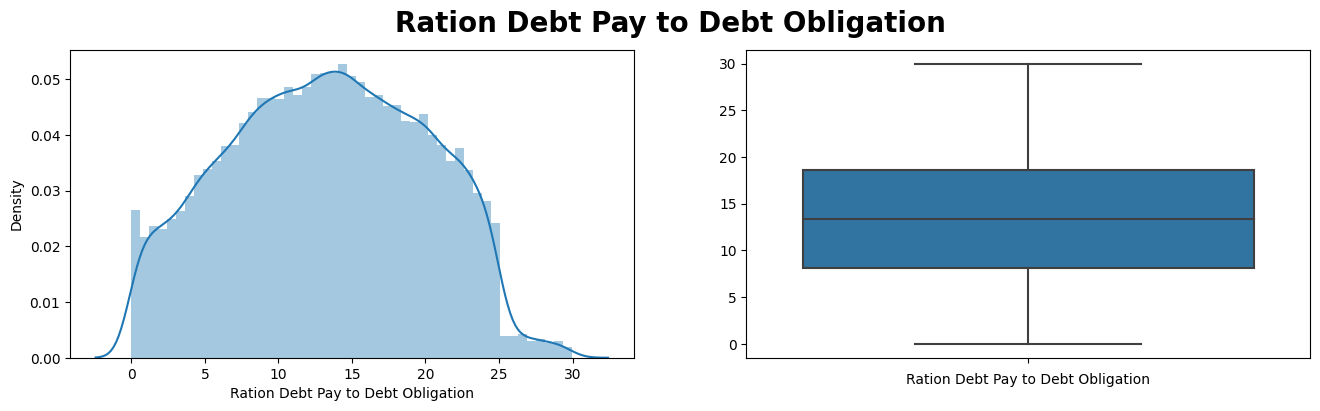

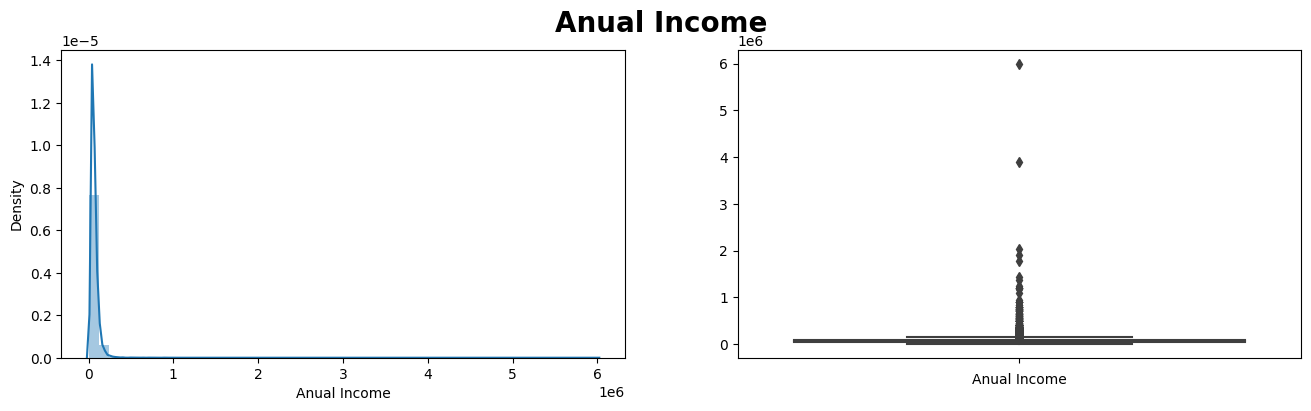

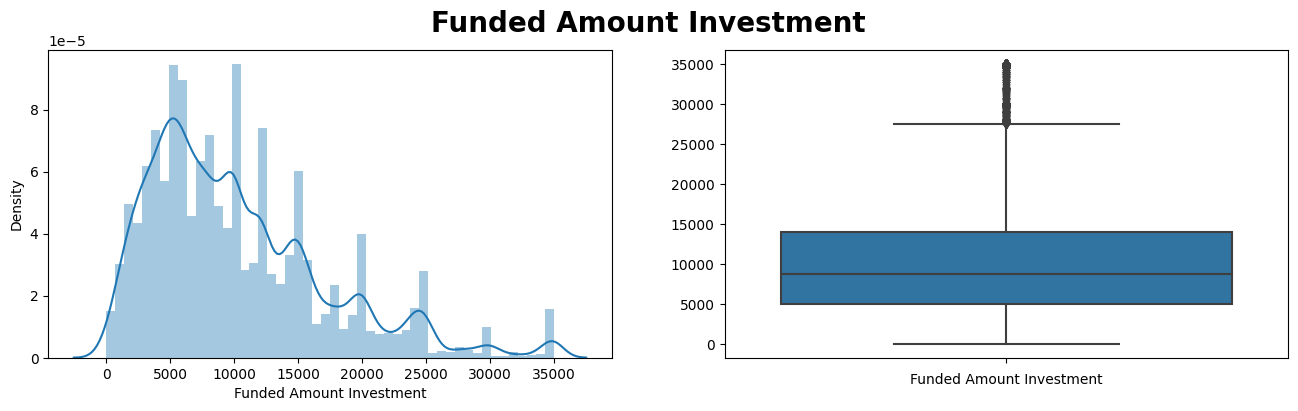

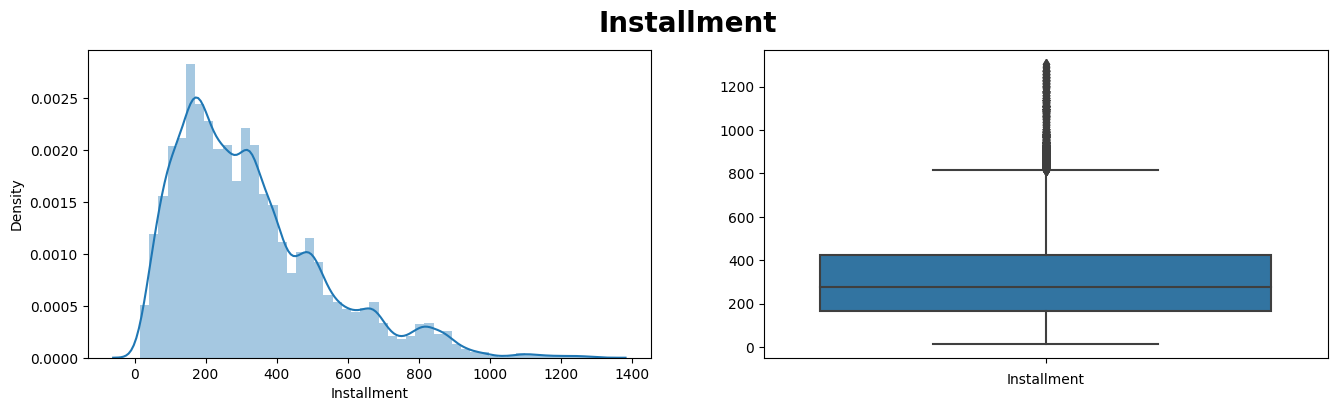

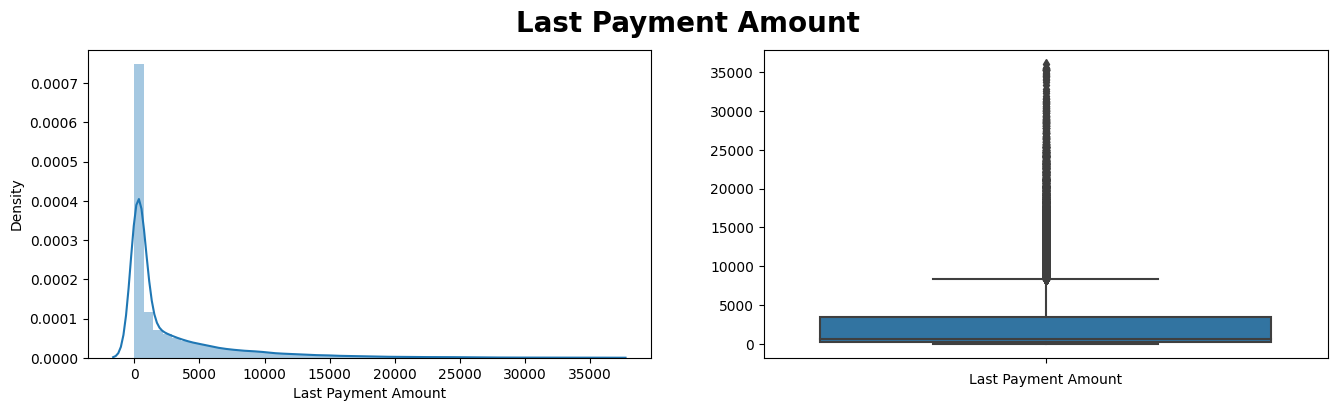

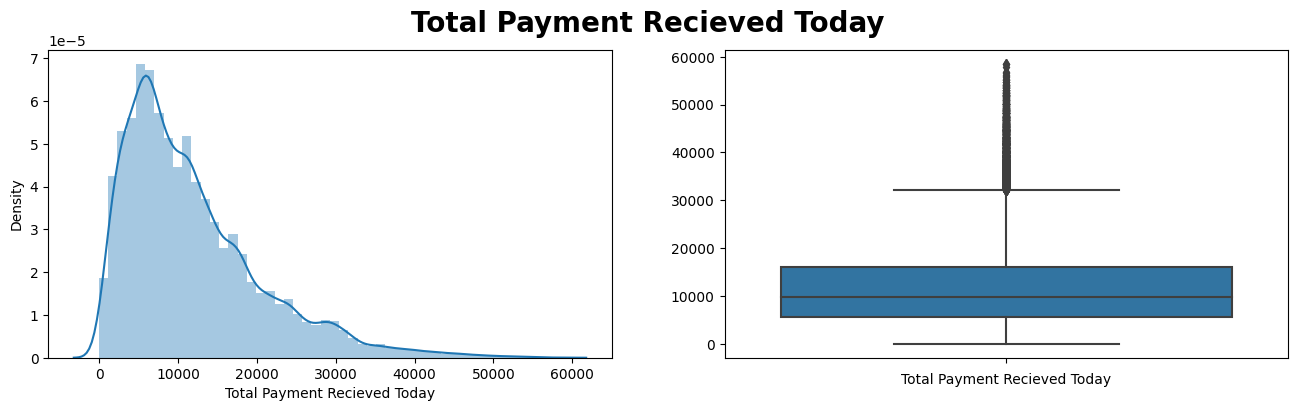

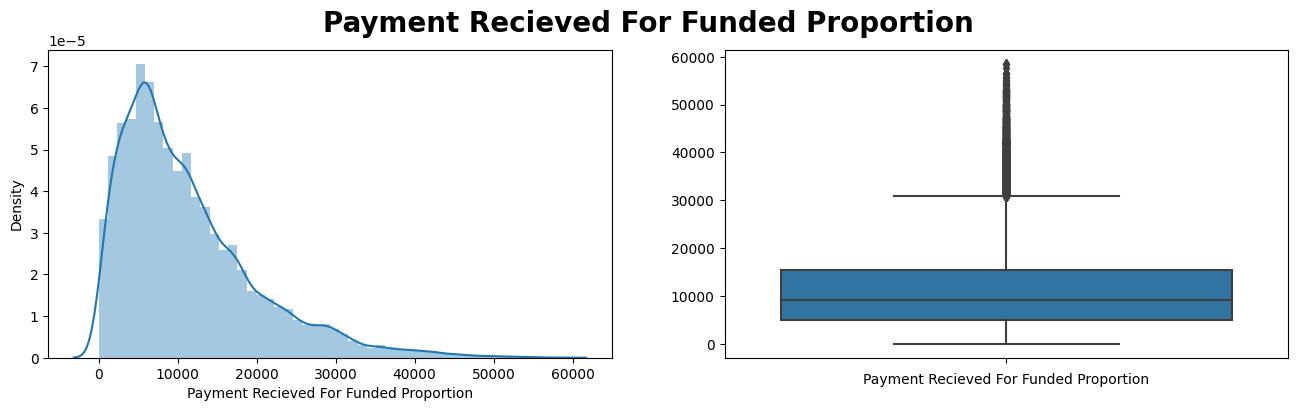

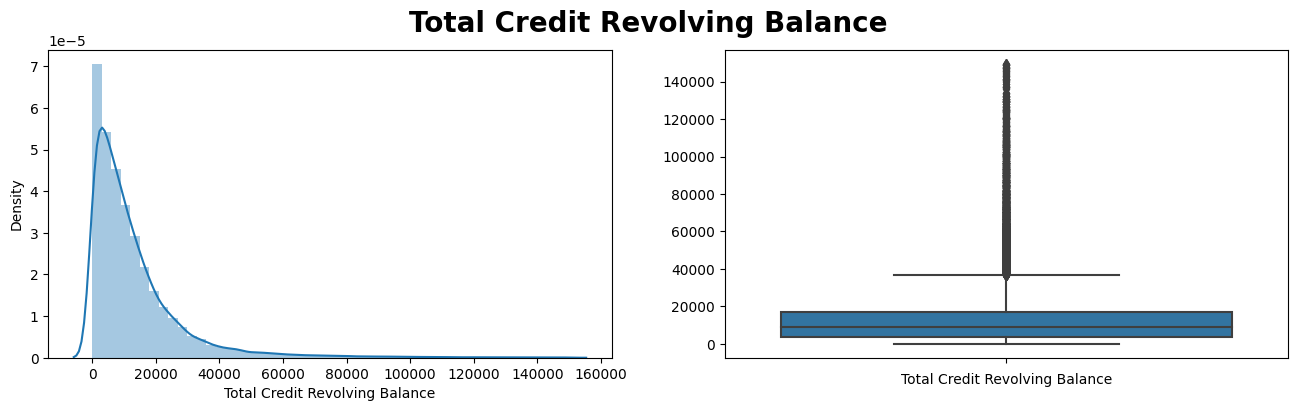

In [41]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
for k in distributionDict.keys():
  dist_investigate(df[distributionDict[k]], k)

## **Outlier Removal**

There are some very large outliers in all of the continues variables with the exception of Loan used relative to availability and ration debt obligation. We would remove these outlier by removing values grater than 99 percentile for interest rate and 95 for the rest of variables. For last payment amount we can put the upper threshold at 90 percentile. Since we don't have any outlier in lower bond we will put the lower threshold as 0. Then check the distribution after outlier removal.

In [42]:
def removeOutlier(data, lowT=0.01, upT=0.99):
  lower = data.quantile(lowT)
  upper = data.quantile(upT)
  data = np.where(data >= upper,
        upper,
        np.where(data <= lower,
        lower,
        data))
  return data

# def removeOutlier(data, lowT=0.01, upT=0.99):
#   lower = data.mean() - 3*data.std()
#   upper = data.mean() + 3*data.std()
#   data = np.where(data >= upper,
#         upper,
#         np.where(data <= lower,
#         lower,
#         data))
#   return data



<IPython.core.display.Javascript object>

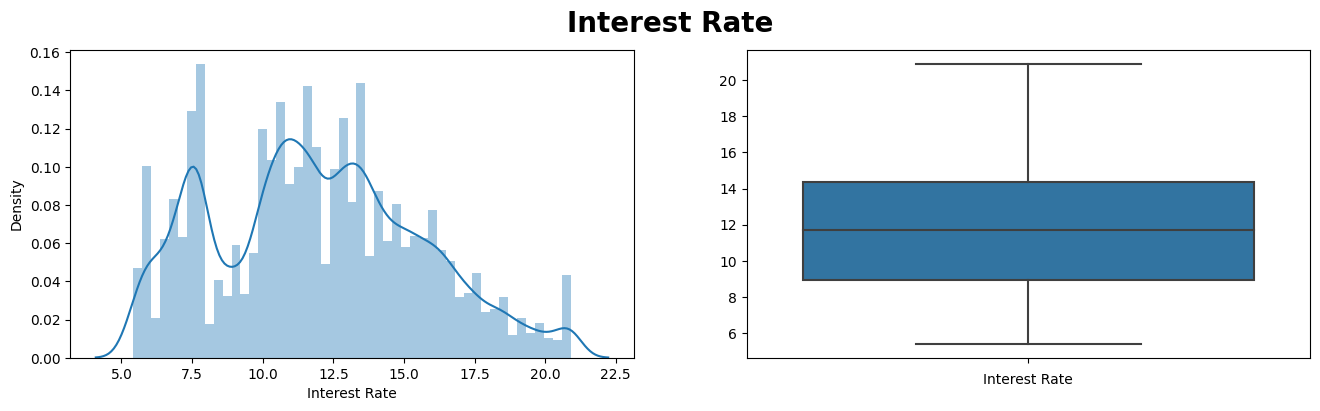

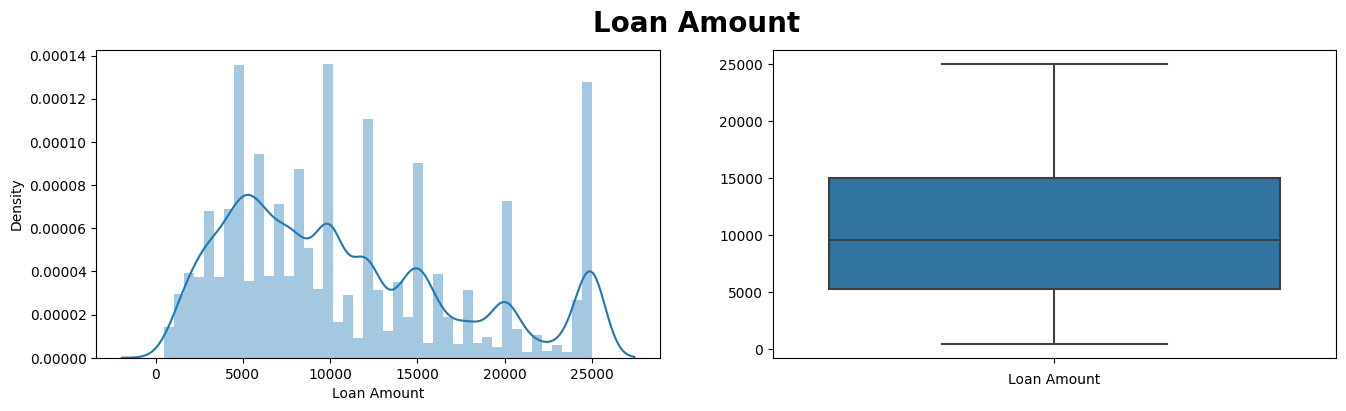

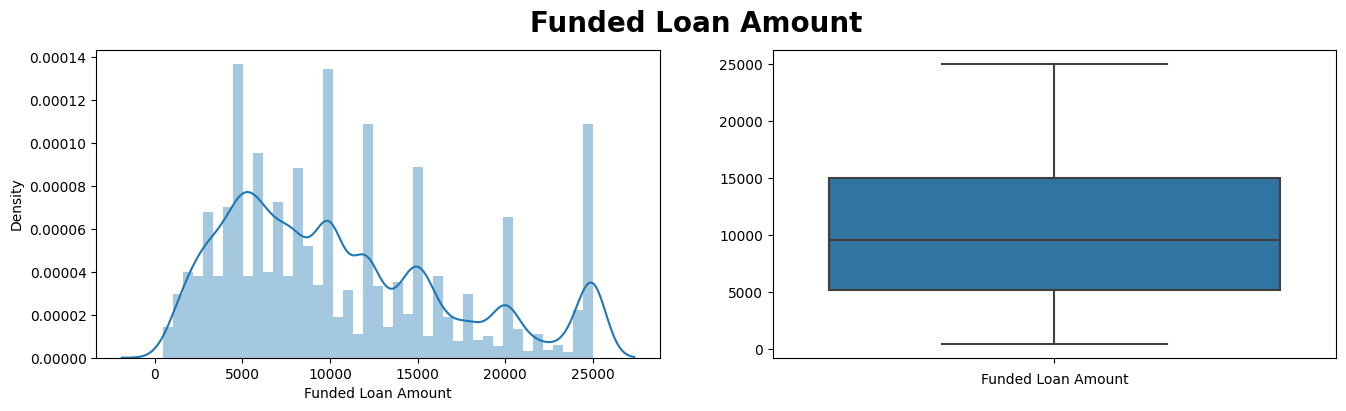

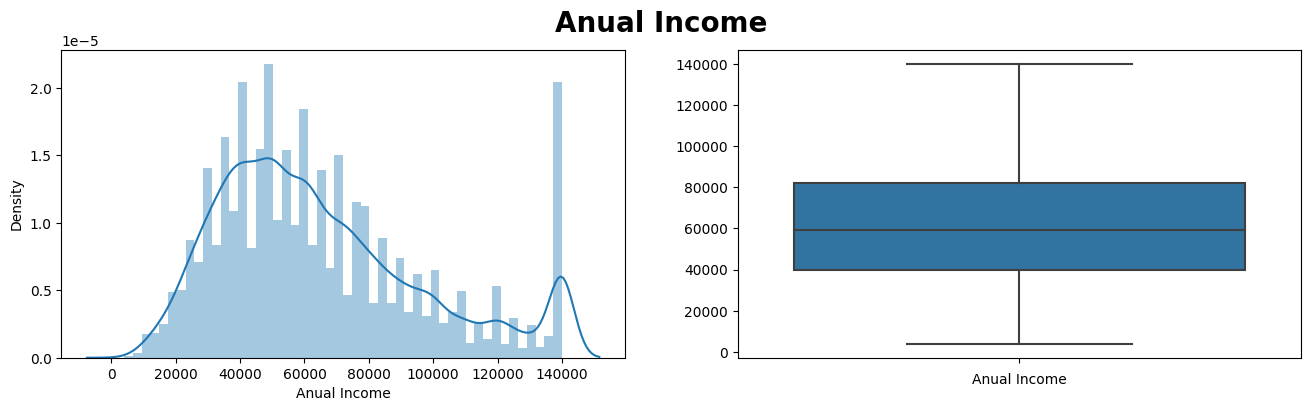

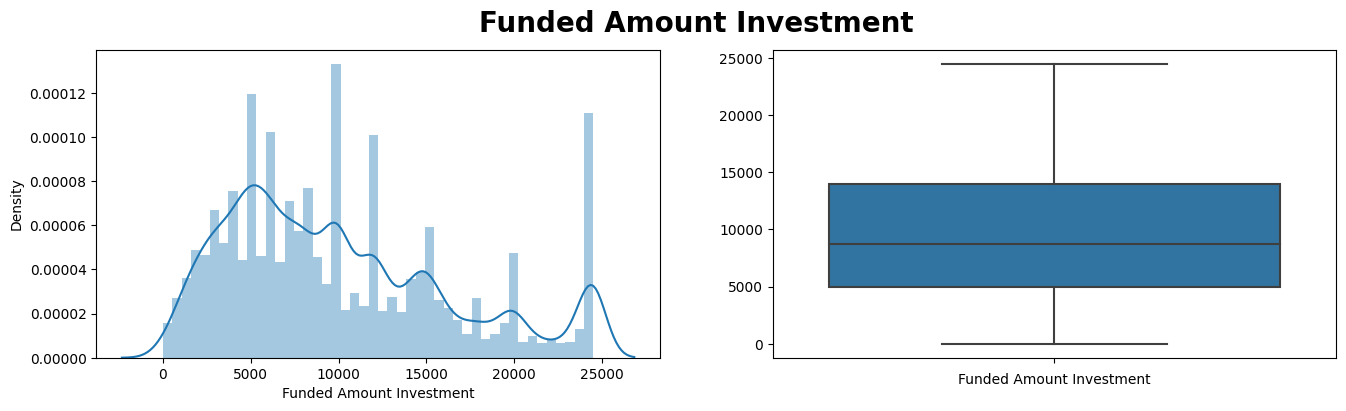

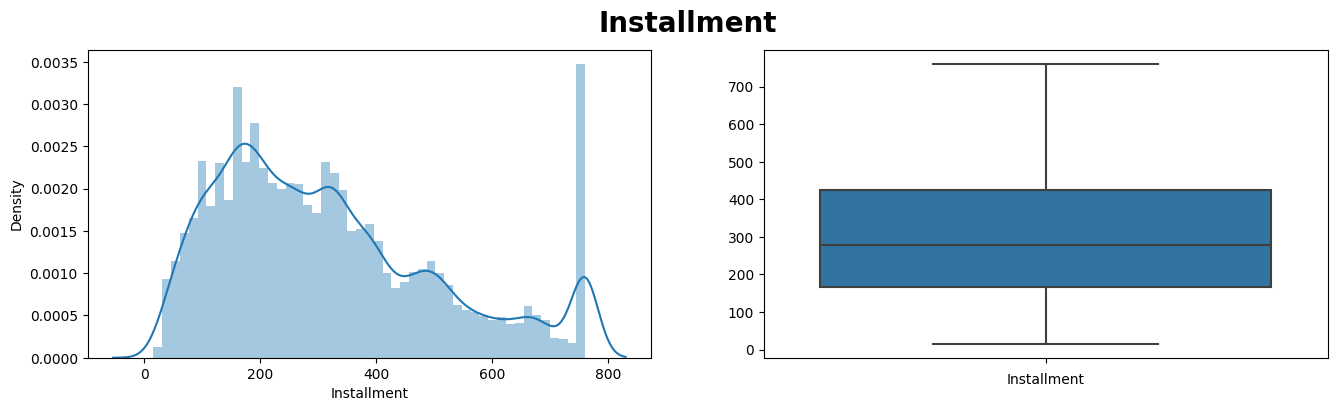

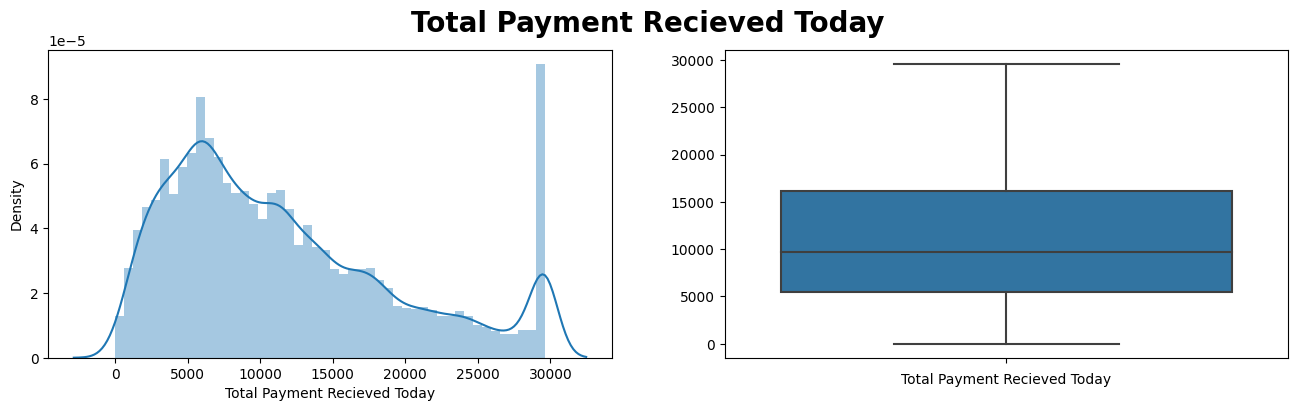

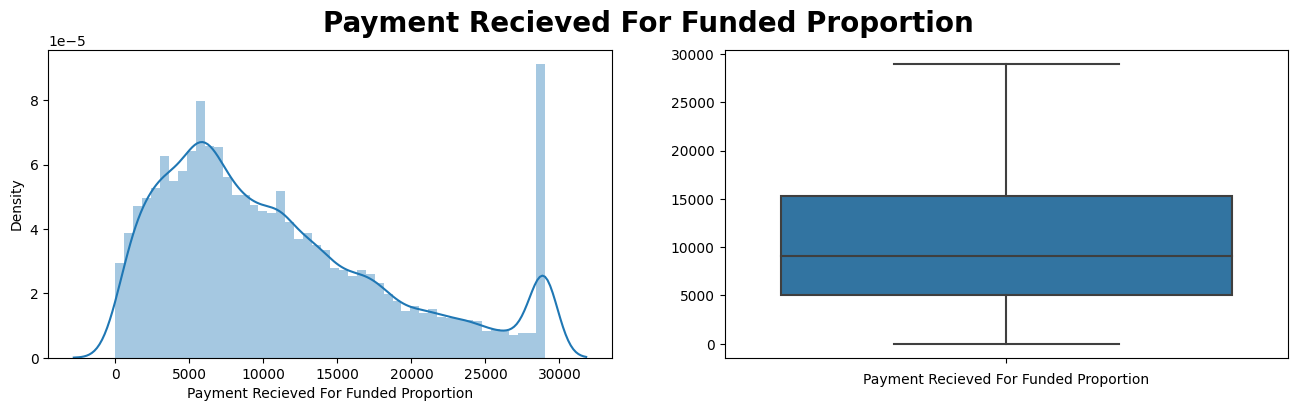

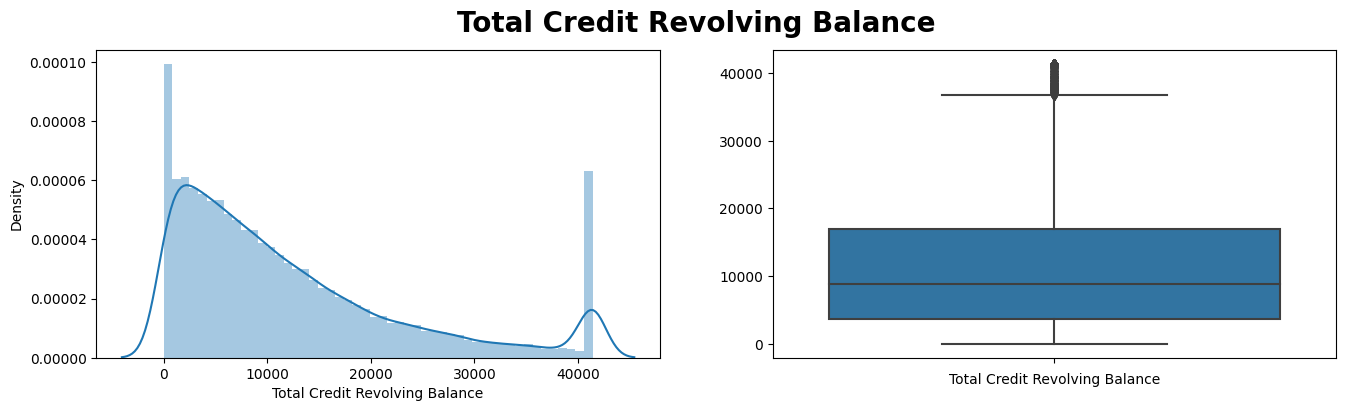

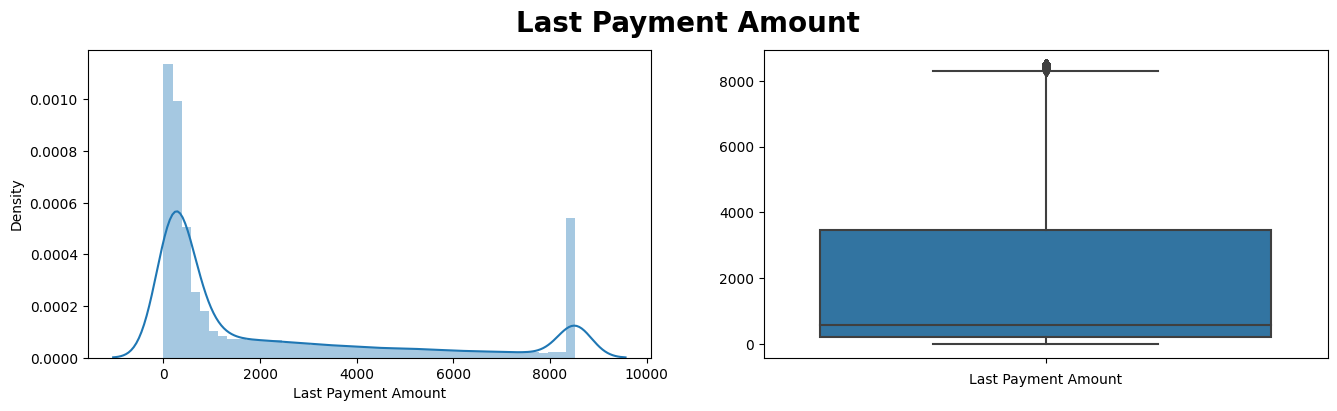

In [51]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
data = removeOutlier(df["int_rate"], lowT=0)
dist_investigate(data, "Interest Rate")

distributionDict = {"Loan Amount": "loan_amnt", "Funded Loan Amount":"funded_amnt",
                    "Anual Income":"annual_inc", "Funded Amount Investment":"funded_amnt_inv",
                    "Installment": "installment", "Total Payment Recieved Today": "total_pymnt",
                    "Payment Recieved For Funded Proportion" :"total_pymnt_inv",
                    "Total Credit Revolving Balance": "revol_bal",}
for k in distributionDict.keys():
  data = removeOutlier(df[distributionDict[k]], lowT=0, upT=0.95)
  dist_investigate(data, k)

data = removeOutlier(df["last_pymnt_amnt"], lowT=0, upT=0.9)
dist_investigate(data, "Last Payment Amount")

### **For categorical variables**: Get general idea about all the categorical variables

In [44]:
def countPlots(data, target, title):
  counts = data[target].value_counts()
  labels = data[target].unique()

  porcent = 100.*counts/counts.sum()

  plt.figure(figsize=(16,4))
  plt.subplot(1,2,1)
  sns.countplot(x=target, data=data, dodge=True, palette="mako_r")
  plt.tick_params(axis='x', rotation=90)

  plt.subplot(1,2,2)
  patches, texts = plt.pie(counts, radius=1.5)
  labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(porcent.index, porcent)]

  sort_legend = True
  if sort_legend:
      patches, labels, dummy =  zip(*sorted(zip(patches, labels, porcent),
                                            key=lambda x: x[2],
                                            reverse=True))

  plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
            fontsize=8)

  plt.suptitle(title, fontsize=20, fontweight="bold")
  plt.show()

def barPlots(data, target, title):
  counts = data[target].value_counts()
  labels = data[target].unique()

  plt.figure(figsize=(16,4))
  sns.countplot(x=target, data=data, palette="mako_r")
  plt.tick_params(axis='x', rotation=90)

  plt.suptitle(title, fontsize=20, fontweight="bold")
  plt.show()

<IPython.core.display.Javascript object>

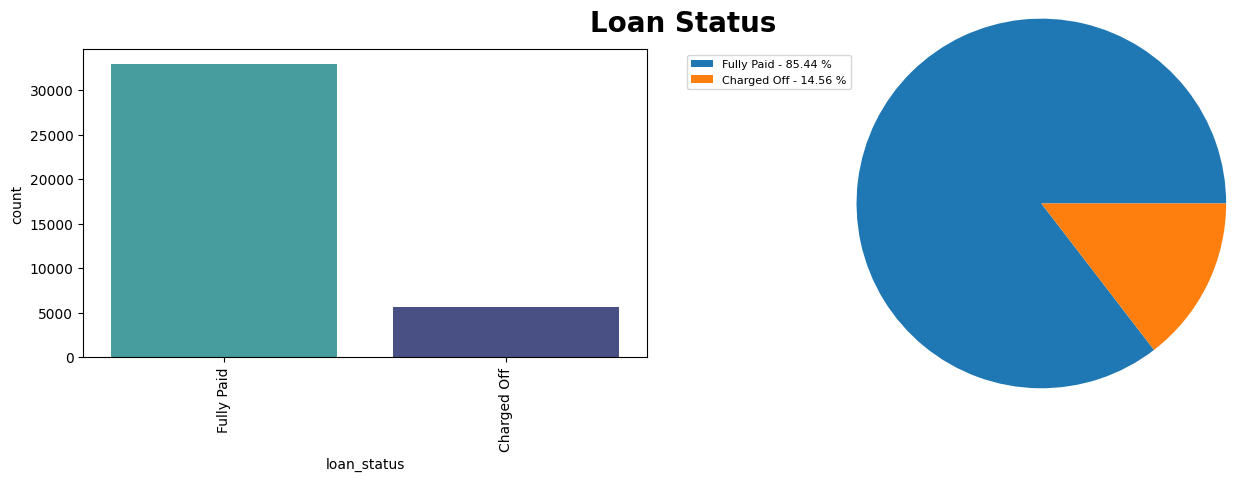

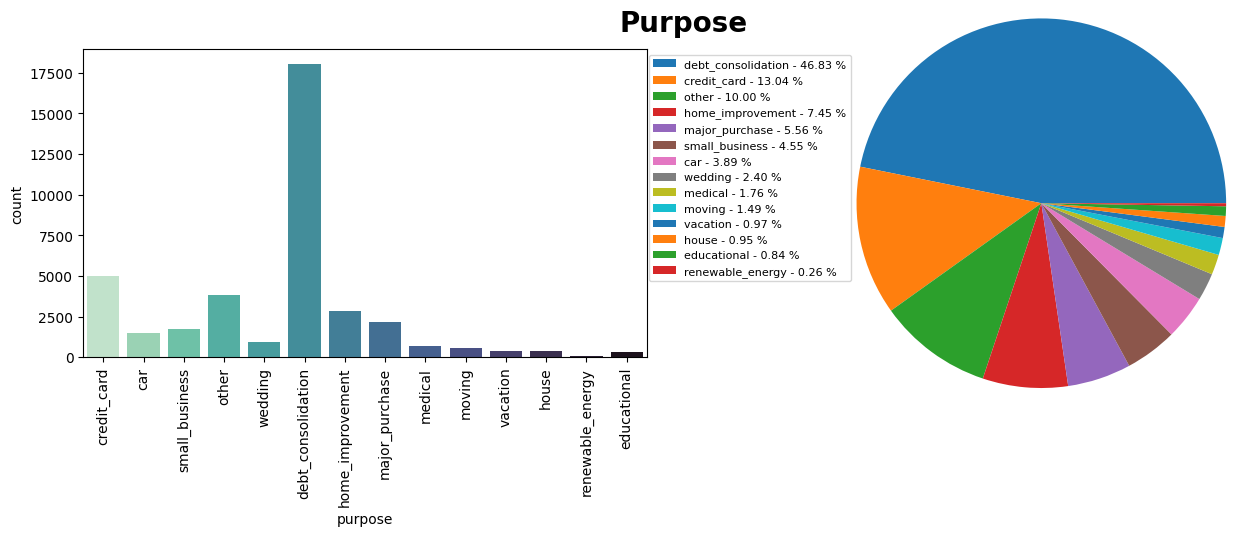

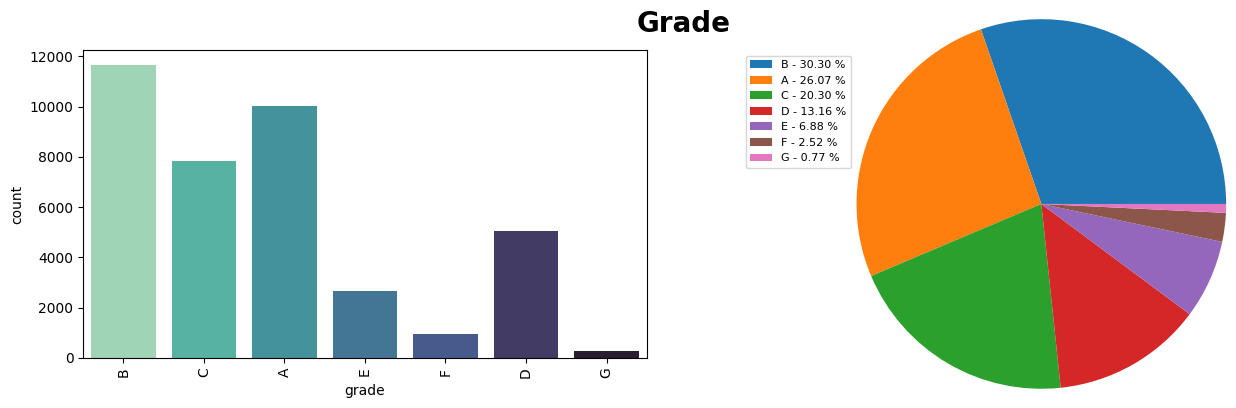

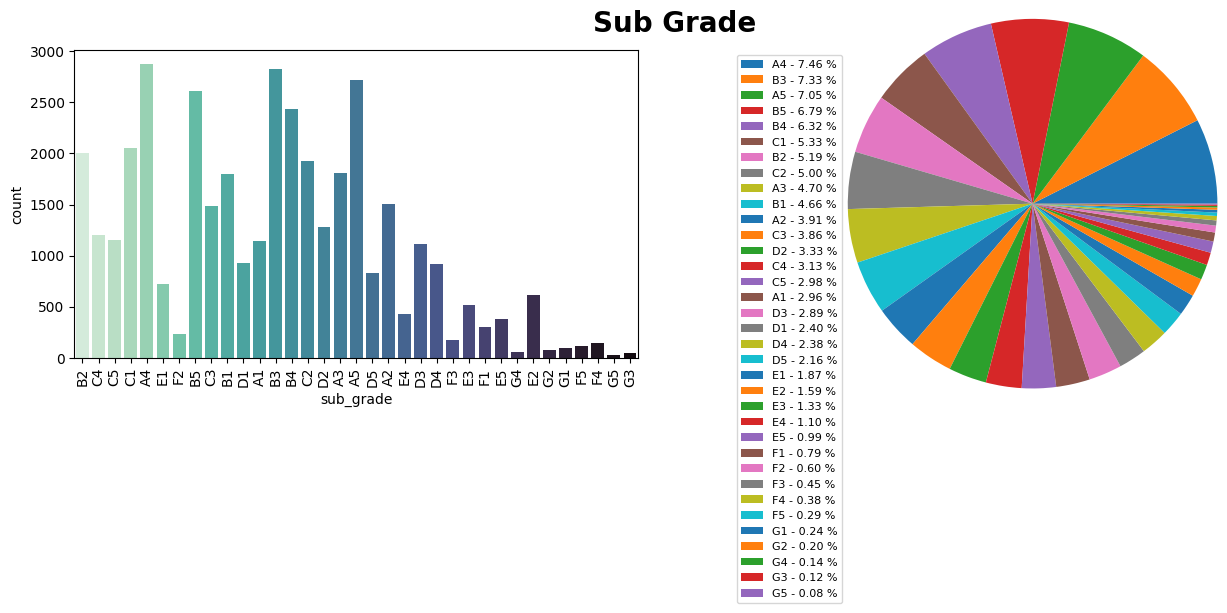

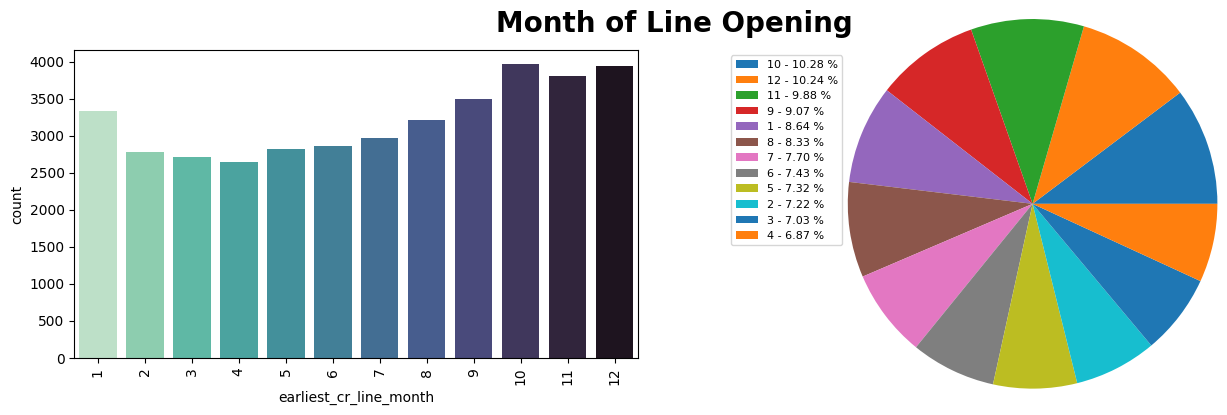

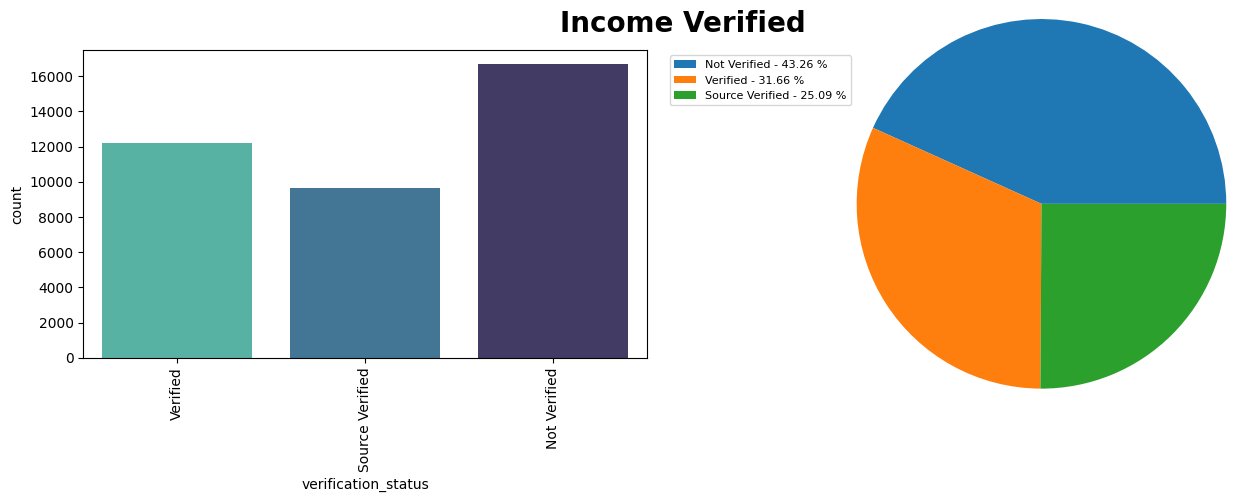

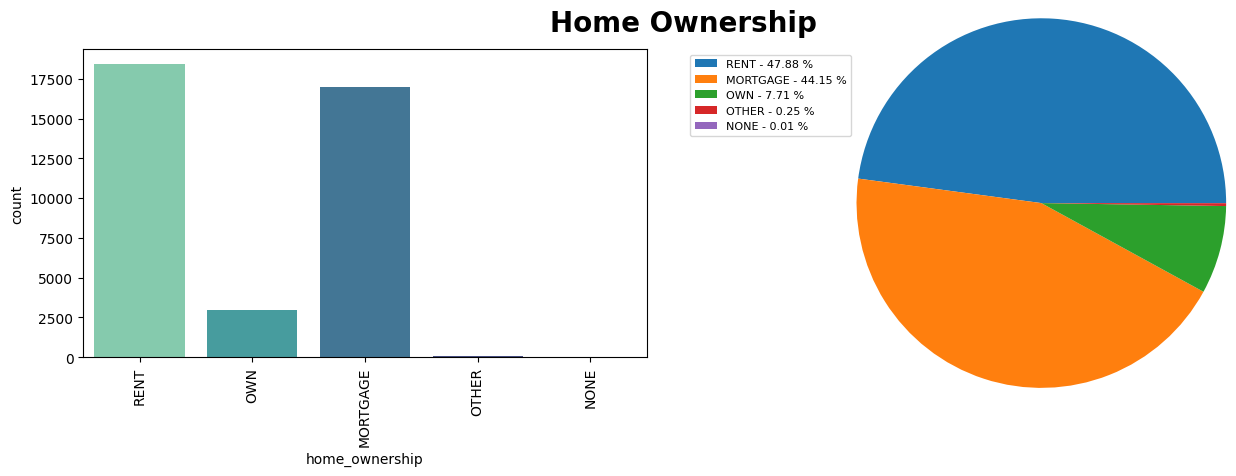

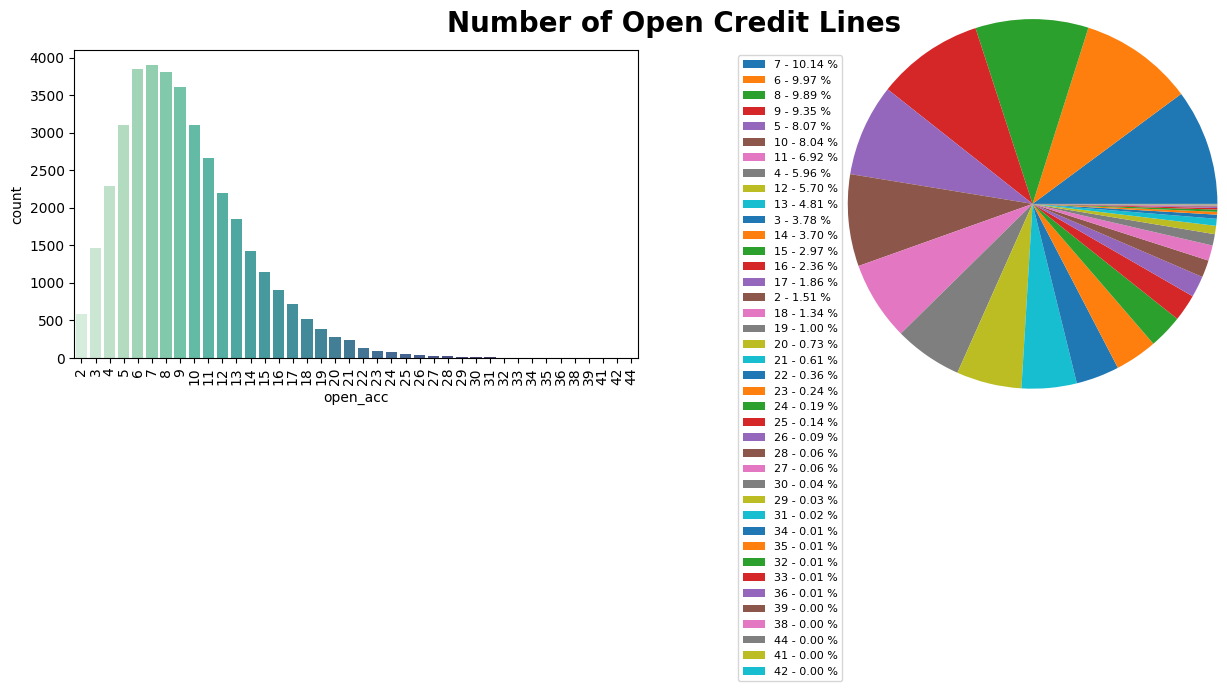

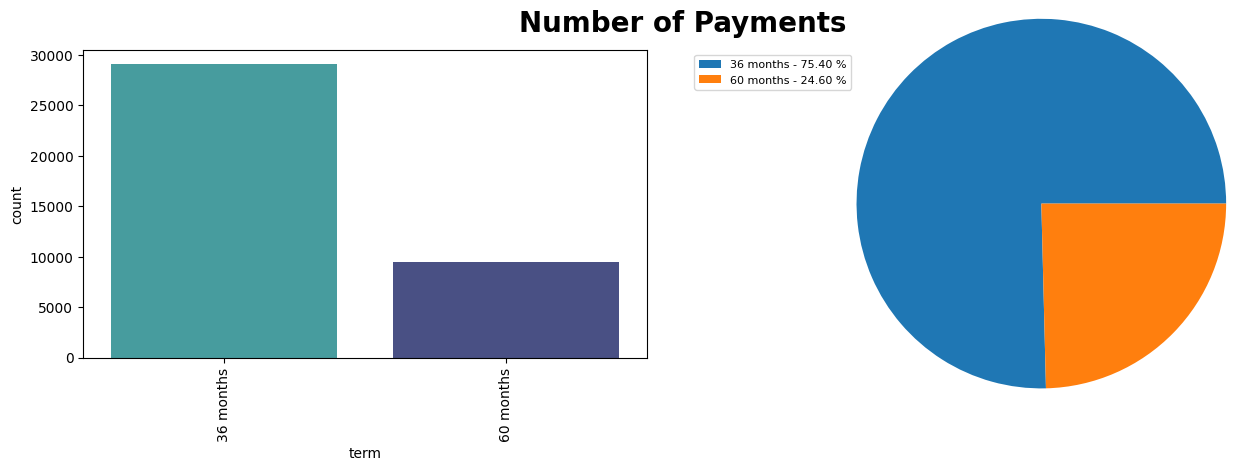

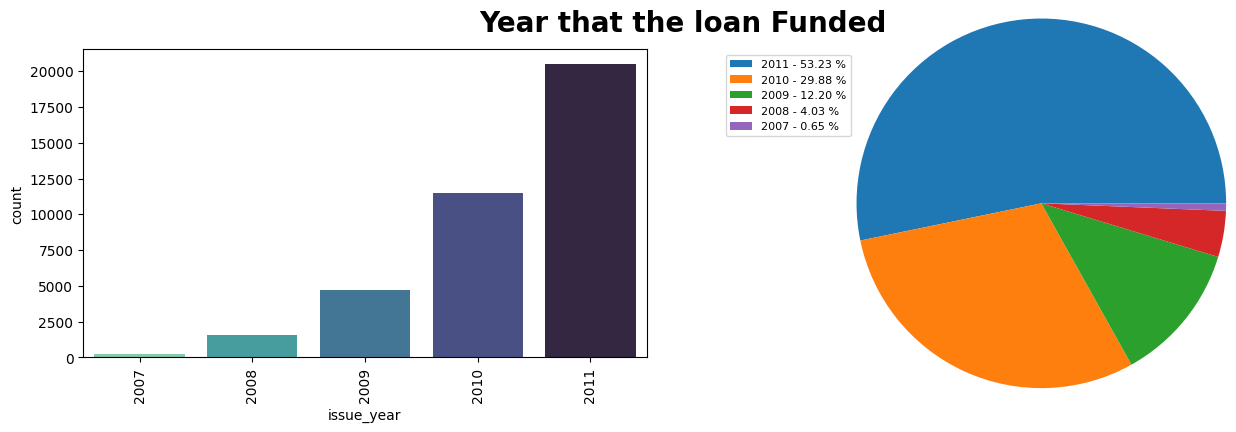

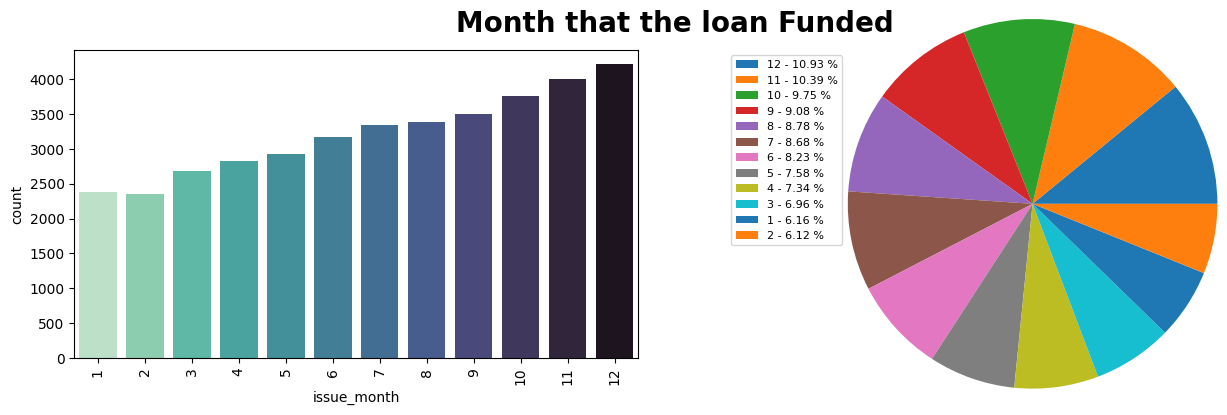

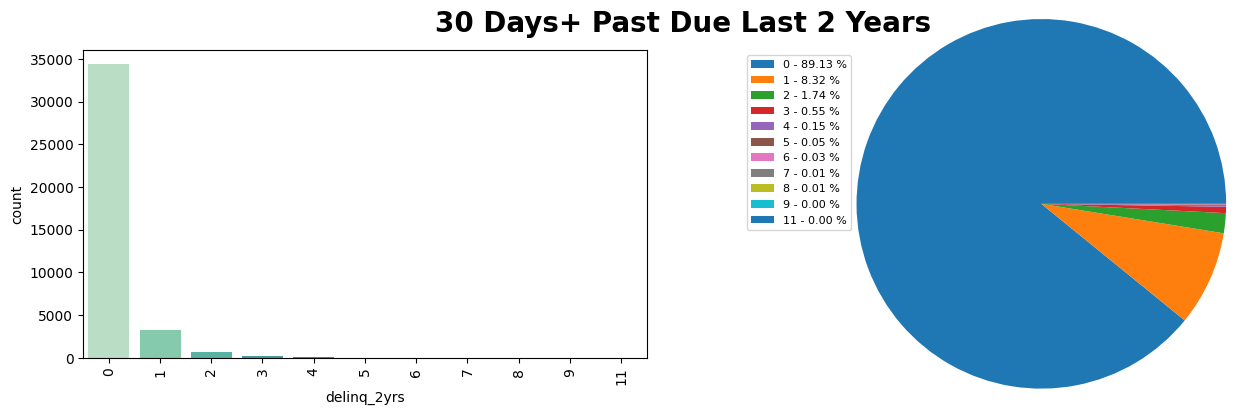

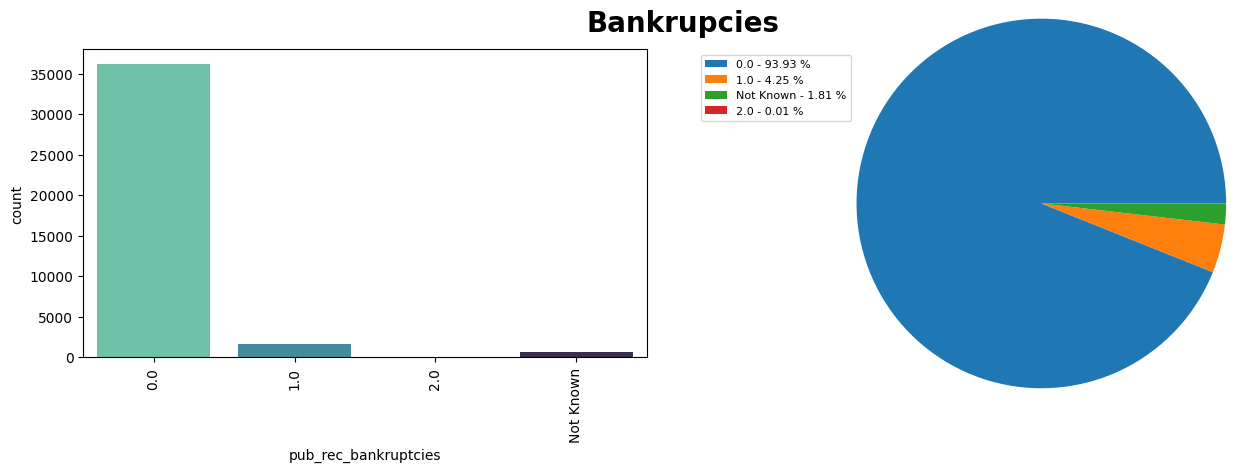

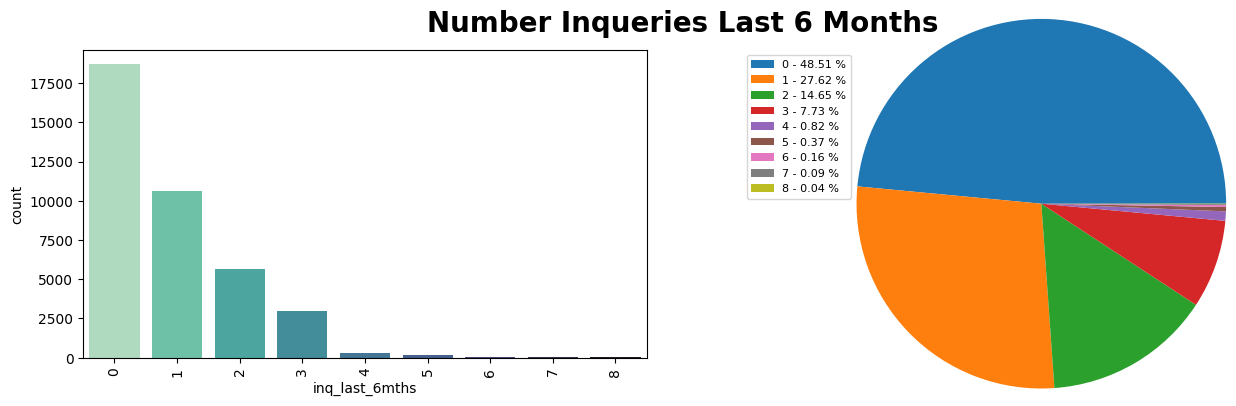

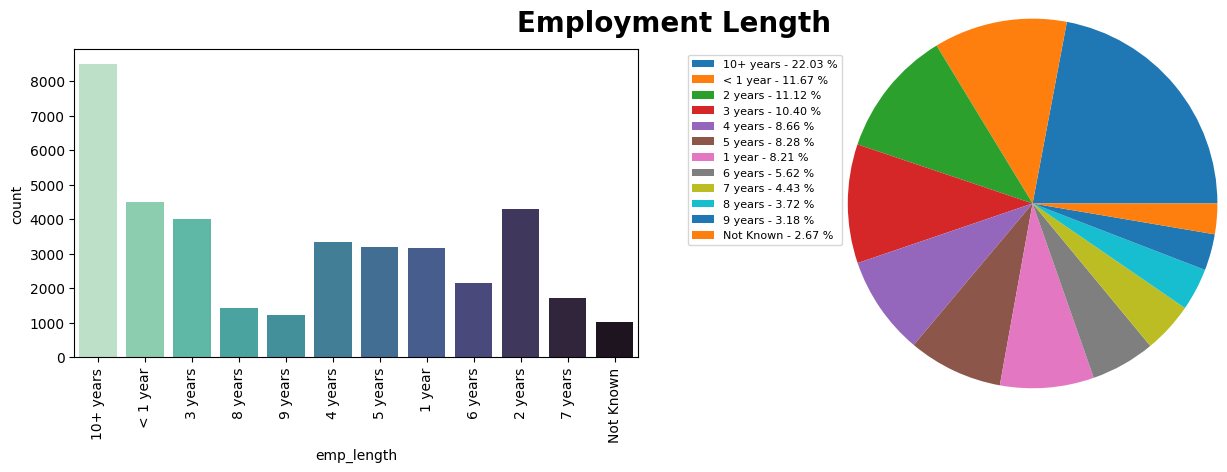

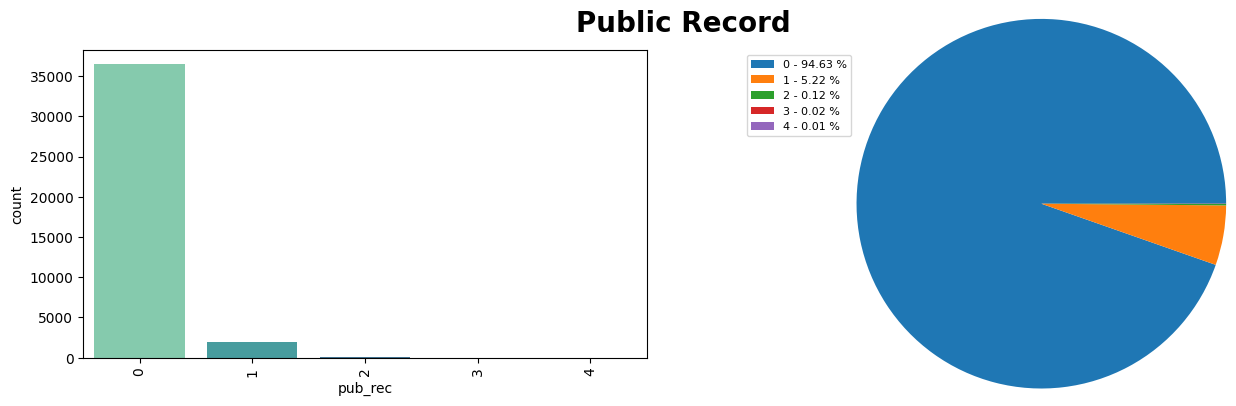

In [52]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))
numericalCols = ["int_rate", "loan_amnt", "funded_amnt", "revol_util", "dti", "annual_inc",
                 "funded_amnt_inv", "installment", "last_pymnt_amnt", "total_pymnt",
                 "total_pymnt_inv"]

categoricalCols = list(set(df.columns) - set(numericalCols+["member_id"]))

categoricalDict1 = {"Loan Status": "loan_status", "Purpose":"purpose",
                   "Grade":"grade", "Sub Grade": "sub_grade",
                    "Month of Line Opening":"earliest_cr_line_month",
                   "Income Verified": "verification_status", "Home Ownership":"home_ownership",
                   "Number of Open Credit Lines":"open_acc", "Number of Payments":"term",
                   "Year that the loan Funded":"issue_year",
                    "Month that the loan Funded":"issue_month",
                   "30 Days+ Past Due In Last 2 Years": "delinq_2yrs", "Bankrupcies": "pub_rec_bankruptcies",
                   "Number Inqueries Last 6 Months": "inq_last_6mths",
                   "Employment Length":"emp_length", "Public Record":"pub_rec"}

for k in categoricalDict1.keys():
  countPlots(df, categoricalDict1[k], k)


<IPython.core.display.Javascript object>

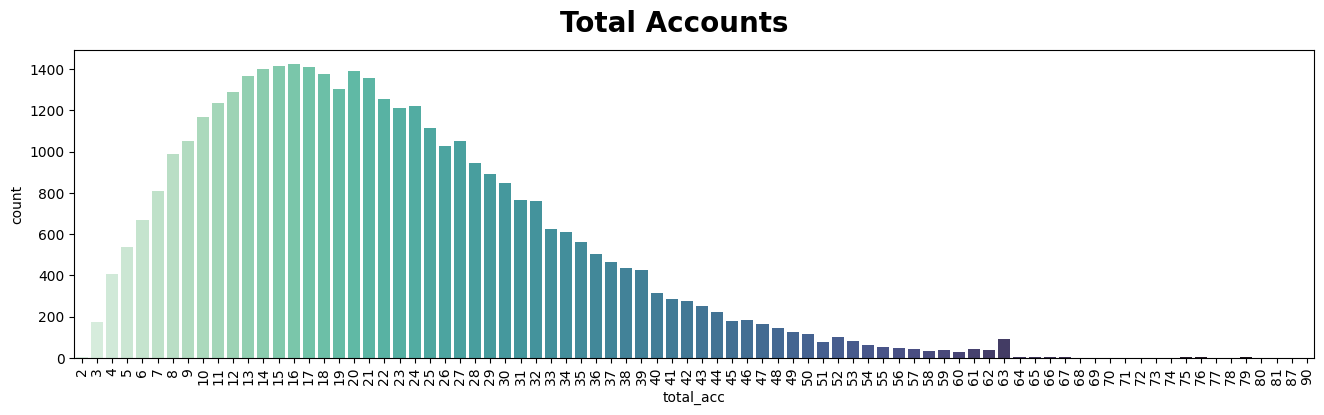

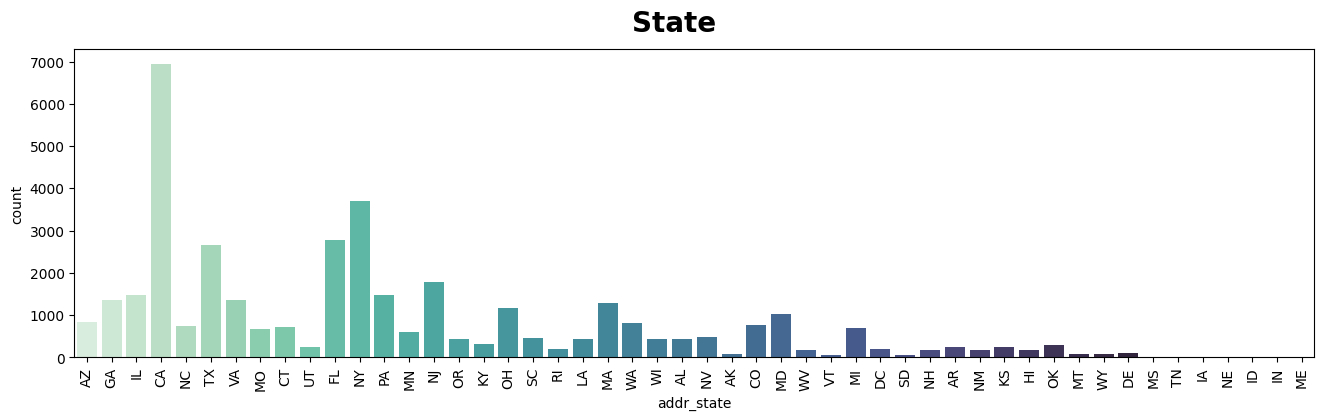

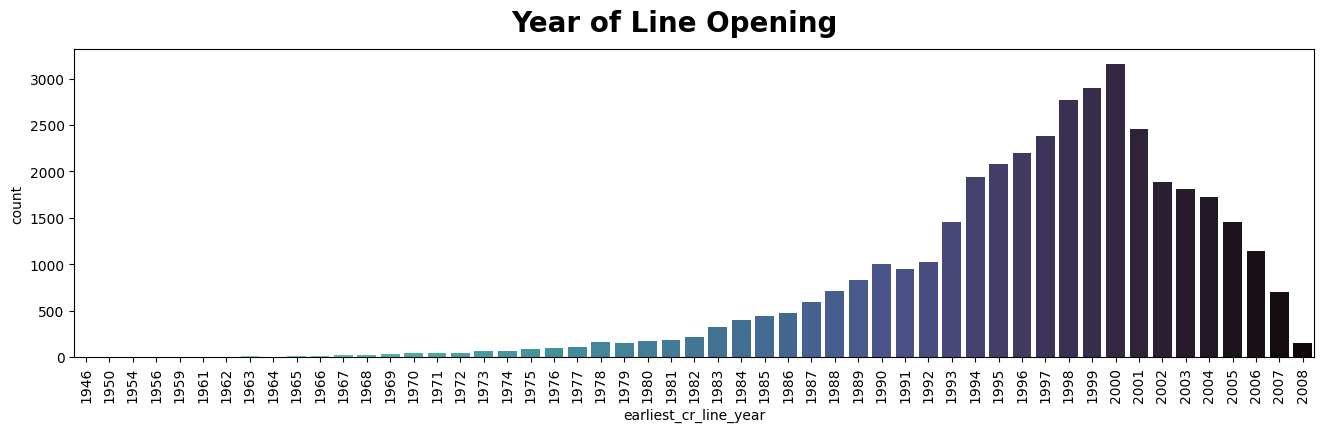

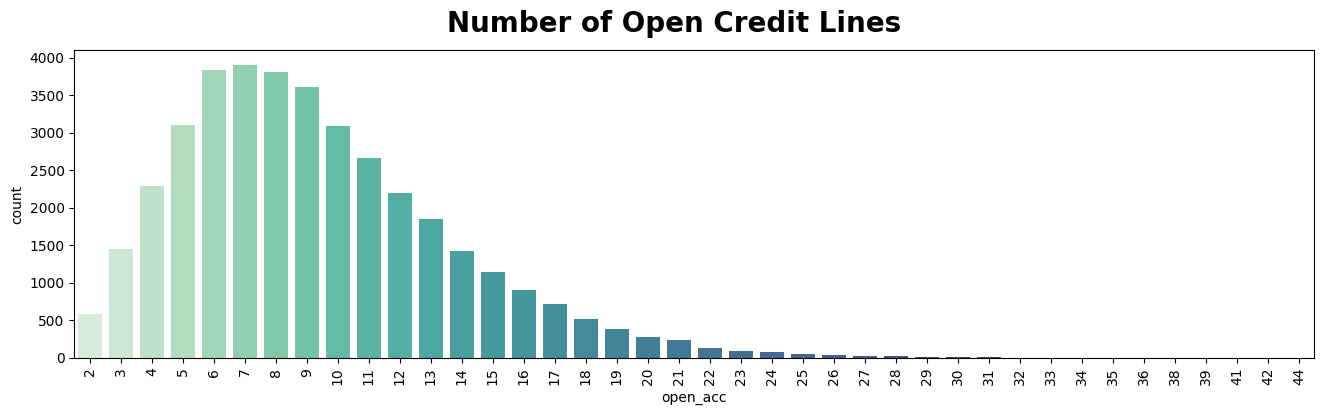

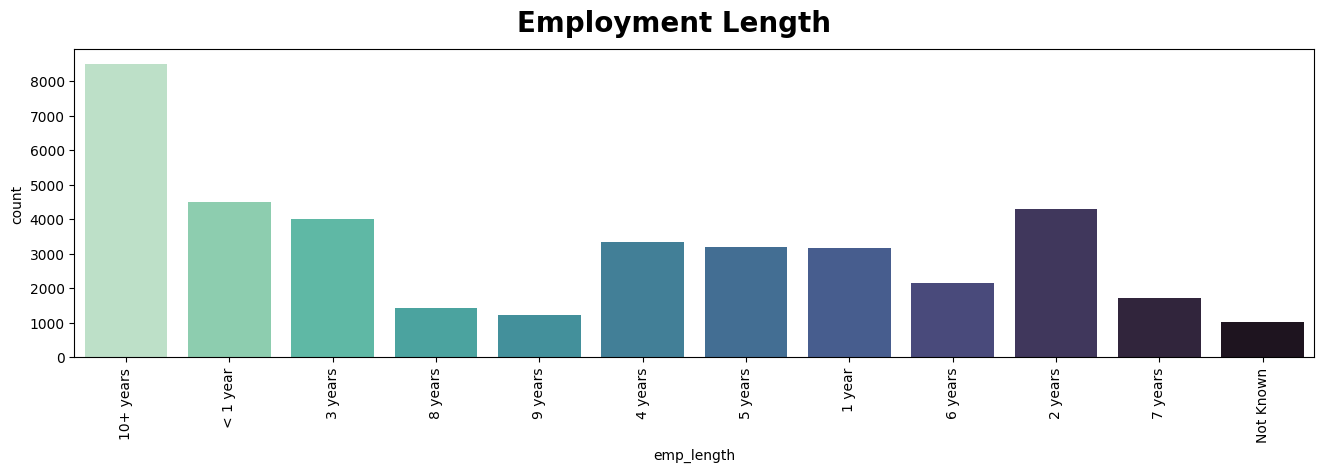

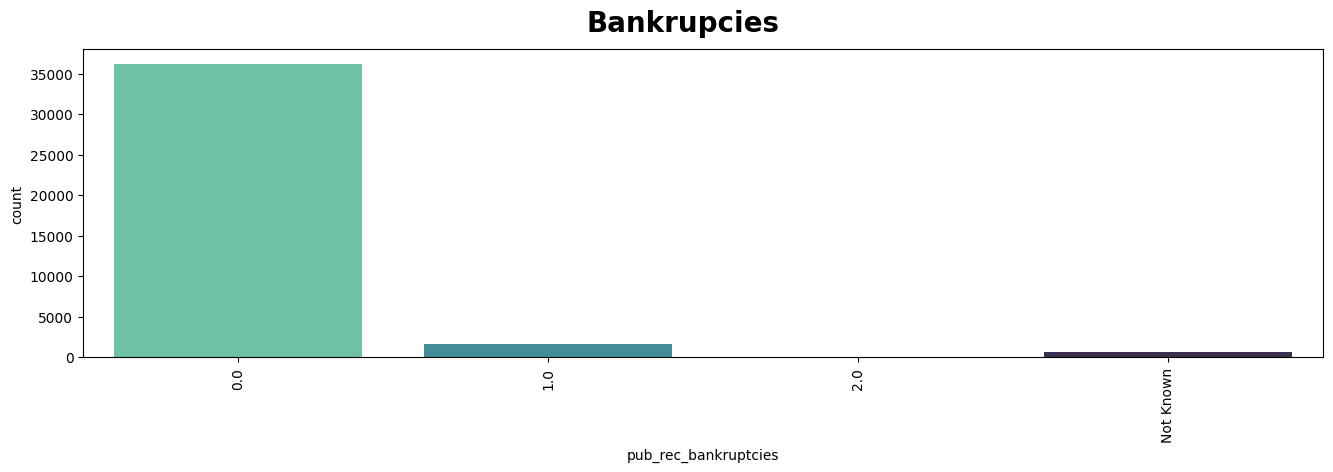

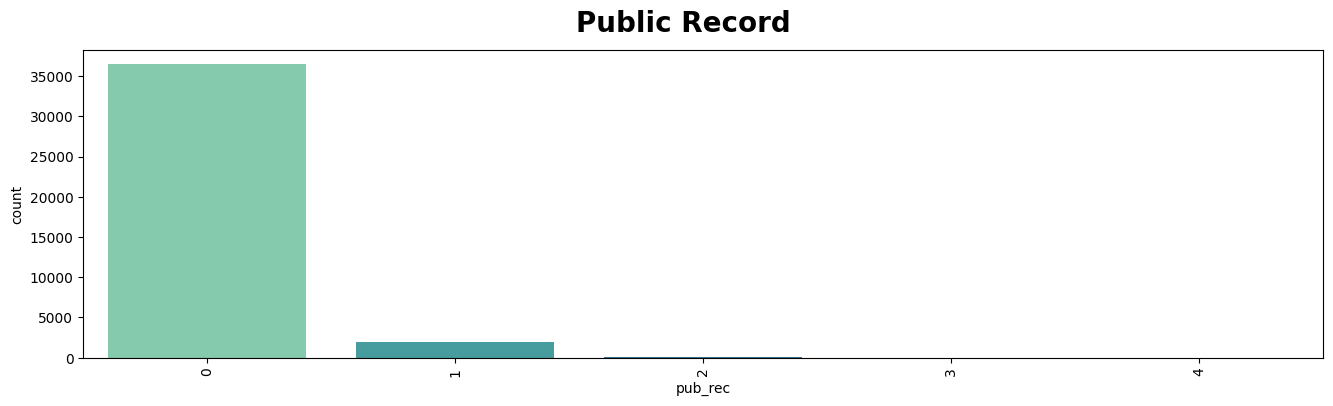

In [49]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))
categoricalDict2 = {"Total Accounts": "total_acc", "State": "addr_state",
                    # "Zip Code":"zip_code",
                   "Year of Line Opening":"earliest_cr_line_year",
                   "Number of Open Credit Lines":"open_acc",
                   "Employment Length":"emp_length",
                    "Bankrupcies": "pub_rec_bankruptcies",
                    "Public Record":"pub_rec"}

for k in categoricalDict2.keys():
  barPlots(df, categoricalDict2[k], k)

In [47]:
df["revol_bal"].nunique()

21275

In [48]:
df.pub_rec_bankruptcies.value_counts()

0.0          36189
1.0           1636
Not Known      697
2.0              5
Name: pub_rec_bankruptcies, dtype: int64

Since the percentage of missing values in bankrupcy records and employment lenght is higher than 1% and there isn't any overlap between these two columns for missing values this is probably better to find a way to find to fill these missing values. We can check it later in **segmented univariate analysis**.

# **Segmented Univariate Analysis**

# **Bivariate Analysis**

Correlation Analysis